### **📌 Title

US Flight Delay Analysis: Trends, Root Causes, and Recommendations
🎯 Project Objective

This project is designed to perform a deep-dive analysis into US domestic flight delay data. The goal is to uncover patterns and determine the root causes of delays, while providing stakeholders with practical, data-driven insights to enhance operational efficiency. Specifically, the project will:

    Analyze Delay Patterns: Examine delay trends over years and months, and across different carriers and airports.

    Root Cause Analysis: Identify and quantify the key factors (including weather, operational issues, and security) contributing to delays.

    Effective Visualization: Present delay metrics using counts, cumulative delay minutes, and normalized ratios for clear and impactful interpretation.

    Stakeholder Guidance: Equip airlines, airports, and passengers with actionable insights to mitigate inefficiencies.

    Strategic Recommendations: Propose targeted, data-driven strategies to reduce delays and optimize air travel performance.

🎯 EDA (Exploratory Data Analysis) Objectives

The exploratory phase of the project will focus on:

    Temporal and Spatial Insights: Mapping and analyzing when and where delays most frequently occur.

    Performance Benchmarking: Comparing the delay metrics among various airports and carriers.

    Cause-Specific Analysis: Breaking down delays by factors such as weather, carrier performance, security issues, NAS (National Airspace System) constraints, and late aircraft arrivals.

    Normalization Measures: Calculating ratios that relate delay counts and minutes to overall flight operations for standardized comparisons.

    Actionable Insights: Generating interpretive insights that can inform future decisions regarding infrastructure investments, policy adjustments, and operational enhancements.

📊 Dataset Description

The dataset under analysis consists of detailed records related to flight arrivals, delay reasons, and operational disruptions (including cancellations and diversions). Each record is aggregated by year, month, carrier, and airport. Key columns include, but are not limited to:

    Year and Month: Time identifiers for each record.

    Carrier Code: Identifier for the airline.

    Airport Identifier: Code for the respective airport.

    Total Flights: The number of flights scheduled.

    Delay Metrics: Metrics such as delay counts, total delay minutes, and potentially delay ratios.

    Delay Causes: Categorical breakdown of delay reasons (e.g., weather, carrier, security, NAS, and late aircraft).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('airline_delay_cause.csv')
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.00,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.00,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.00,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.00,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.00,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179333,2015,1,WN,Southwest Airlines Co.,ONT,"Ontario, CA: Ontario International",892.0,184.0,59.21,2.61,...,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0
179334,2015,1,WN,Southwest Airlines Co.,ORF,"Norfolk, VA: Norfolk International",151.0,45.0,18.00,2.01,...,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0
179335,2015,1,WN,Southwest Airlines Co.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",251.0,68.0,25.17,0.08,...,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0
179336,2015,1,WN,Southwest Airlines Co.,PDX,"Portland, OR: Portland International",793.0,173.0,64.00,1.27,...,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0


In [3]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [4]:
data.shape

(179338, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [6]:
data.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [7]:
data['carrier'].value_counts()

carrier
OO    23821
DL    14980
MQ    11299
AA    10912
UA    10418
WN    10051
EV     8793
G4     8761
F9     8307
AS     7754
9E     7494
YV     6877
B6     6827
OH     6545
YX     6072
NK     4950
ZW     4468
PT     4160
G7     3948
C5     3430
QX     3203
HA     1952
AX     1932
CP      926
VX      821
US      434
EM      144
KS       44
9K       15
Name: count, dtype: int64

In [8]:
count_col = ['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']
data['arr_del15'] = data['arr_del15'].fillna(data[count_col].sum(axis=1))

In [9]:
data.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15                0
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,2019.479315,6.485611,327.816969,58.627089,18.572643,2.035742,17.094929,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410860,3.464020,931.001446,164.277835,47.389651,6.894812,56.279604,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.960000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.400000,0.220000,3.300000,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,218.000000,40.000000,14.700000,1.620000,9.860000,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [12]:
data['airport_name'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Allentown/Bethlehem/Easton, PA: Lehigh Valley ...
1                  Alexandria, LA: Alexandria International
2               Augusta, GA: Augusta Regional at Bush Field
3                          Albany, NY: Albany International
4         Atlanta, GA: Hartsfield-Jackson Atlanta Intern...
                                ...                        
179333                   Ontario, CA: Ontario International
179334                   Norfolk, VA: Norfolk International
179335    West Palm Beach/Palm Beach, FL: Palm Beach Int...
179336                 Portland, OR: Portland International
179337         Philadelphia, PA: Philadelphia International
Name: airport_name, Length: 178997, dtype: object>

In [13]:
data['airport'].value_counts

<bound method IndexOpsMixin.value_counts of 0         ABE
1         AEX
2         AGS
3         ALB
4         ATL
         ... 
179333    ONT
179334    ORF
179335    PBI
179336    PDX
179337    PHL
Name: airport, Length: 178997, dtype: object>

**Exploratory Data Analysis(EDA)**

In [14]:
#we first do analysis year wise

In [15]:
yearly = data.groupby('year')[['arr_flights','arr_del15']].sum().reset_index()
yearly['delay_ratio'] = yearly['arr_del15']/yearly['arr_flights']
yearly.sort_values(by = 'arr_flights',ascending=False)

,year,arr_flights,arr_del15,delay_ratio
4,2019,8091684.0,1527455.0,0.188768
3,2018,7848697.0,1481608.0,0.188771
8,2023,7278739.0,1464539.0,0.201208
7,2022,7013508.0,1426305.0,0.203365
6,2021,6311871.0,1068059.0,0.169214
0,2015,5819079.0,1063439.0,0.182750
2,2017,5674621.0,1029474.0,0.181417
1,2016,5617658.0,964239.0,0.171644
5,2020,5022397.0,468955.0,0.093373


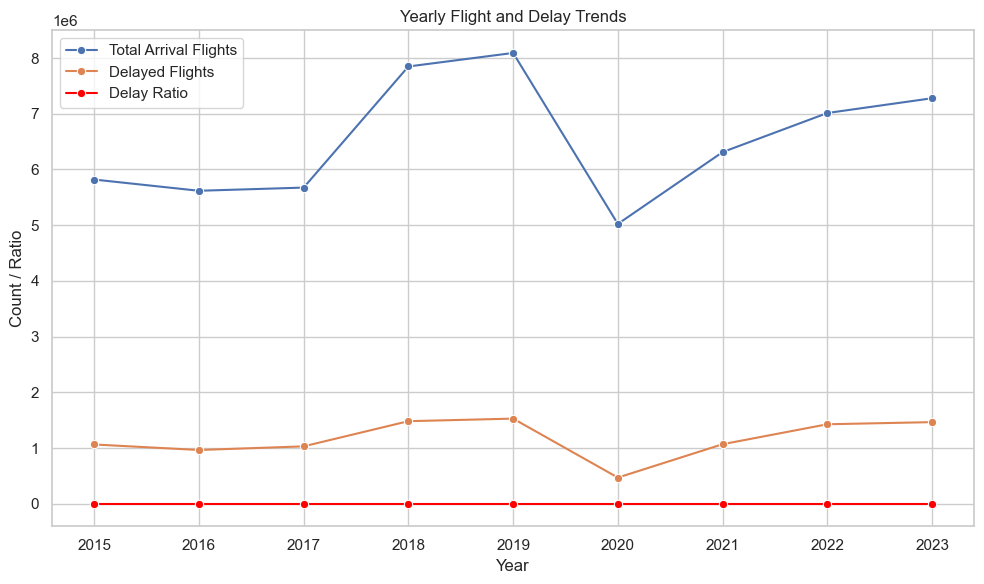

In [16]:

yearly = data.groupby('year')[['arr_flights', 'arr_del15']].sum().reset_index()
yearly['delay_ratio'] = yearly['arr_del15'] / yearly['arr_flights']

# Sort if needed
yearly = yearly.sort_values(by='year')

# Plot setup
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Plotting
sns.lineplot(data=yearly, x='year', y='arr_flights', marker='o', label='Total Arrival Flights')
sns.lineplot(data=yearly, x='year', y='arr_del15', marker='o', label='Delayed Flights')
sns.lineplot(data=yearly, x='year', y='delay_ratio', marker='o', label='Delay Ratio', color='red')

# Labels and title
plt.title('Yearly Flight and Delay Trends')
plt.xlabel('Year')
plt.ylabel('Count / Ratio')
plt.legend()
plt.tight_layout()
plt.show()


🔵 Total Arrival Flights

    Peak in 2019: Arrival flights steadily increased and peaked in 2019 (~8.1 million flights), indicating a strong pre-pandemic growth in air travel.

    Pandemic Impact in 2020: A significant drop in 2020 (~5 million flights) highlights the severe impact of COVID-19 on flight operations.

    Recovery Phase: Post-2020, there’s a gradual recovery in total flights, reaching around 7.3 million by 2023.

🟠 Delayed Flights

    Stable Delay Volume Pre-COVID: Between 2015–2019, the number of delayed flights remained around 1–1.6 million, showing consistent delay patterns.

    2020 Drop: Delays dropped sharply in 2020, aligning with the overall flight volume reduction during the pandemic.

    Post-2020 Rise: Delayed flights rose again from 2021–2023, indicating increasing traffic and possibly persistent operational inefficiencies.

🔴 Delay Ratio

    Relatively Stable: Despite varying flight volumes, the delay ratio stays fairly consistent across the years, suggesting a constant proportion of delays.

    2020 Anomaly: While the total number of flights dropped in 2020, the delay ratio didn’t spike—showing that flight delays decreased proportionally.

    No Major Improvement: Even after pandemic recovery, the ratio doesn’t show strong signs of efficiency improvement, hinting at systemic issues in delay management.

In [17]:
print('Year with most delay', yearly.loc[yearly['arr_del15'].idxmax(),'year'])
print('Year with least delay', yearly.loc[yearly['arr_del15'].idxmin(),'year'])

print('Year with most Flights', yearly.loc[yearly['arr_flights'].idxmax(),'year'])
print('Year with least Flights', yearly.loc[yearly['arr_flights'].idxmin(),'year'])

print('Year with highest delay ratio', yearly.loc[yearly['delay_ratio'].idxmax(),'year'])
print('Year with lowest dealy_ratio', yearly.loc[yearly['delay_ratio'].idxmin(),'year'])

Year with most delay 2019
Year with least delay 2020
Year with most Flights 2019
Year with least Flights 2020
Year with highest delay ratio 2022
Year with lowest dealy_ratio 2020


📊 Key Insights

Traffic ≠ Efficiency: Even with fewer flights in 2022 vs 2019, the delay ratio worsened, indicating inefficiencies aren’t purely volume-dependent.

Pandemic Reset: 2020 showed that low traffic significantly improves reliability—but it’s not sustainable economically.

Post-COVID Recovery Needs Optimization: As flights ramped up after 2020, managing delays became harder—highlighting the need for better operational planning, automation, and infrastructure upgrades.



In [18]:
def plot_delay_flights_count(df):
    delay_cols = ['weather_delay', 'carrier_delay', 'late_aircraft_delay', 'security_delay', 'nas_delay']
    available_cols = [col for col in delay_cols if col in df.columns]
    if not available_cols:
        print("No delay reason columns found.")
        return

    delay_counts = (df[available_cols] > 0).sum()
    plt.figure(figsize=(10, 5))
    delay_counts.plot(kind='bar', color='red')
    plt.title('Number of Flights with Each Delay Reason')
    plt.ylabel('Number of Flights')
    plt.xlabel('Delay Reason')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

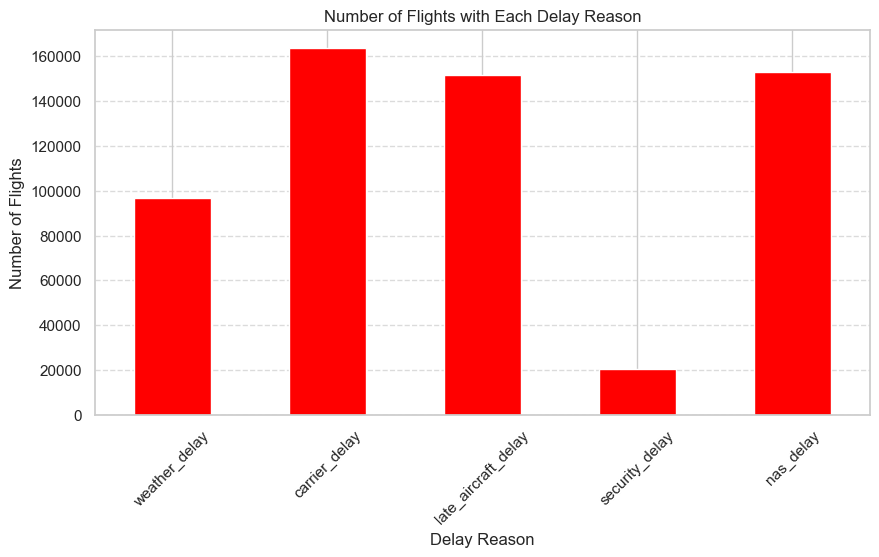

In [19]:
plot_delay_flights_count(data)

📊 Top Delay Contributors

    🚨 Carrier Delay is the leading cause, affecting the highest number of flights (~165K).

    ✈️ Late Aircraft Delay and 🛰️ NAS Delay also contribute significantly, close behind the top cause.

🌦️ Moderate Delay Factor

    Weather Delay affects a notable number of flights (~95K), though less than operational delays.

🔐 Minor Contributor

    Security Delay impacts the least number of flights, indicating it’s a rare cause of delay.

🧠 Insight Summary

    Operational inefficiencies (carrier & late aircraft) and airspace issues (NAS) are the dominant delay sources.

    Weather is a consistent but secondary factor.

    Security-related delays are minimal, possibly due to strong preventive systems.

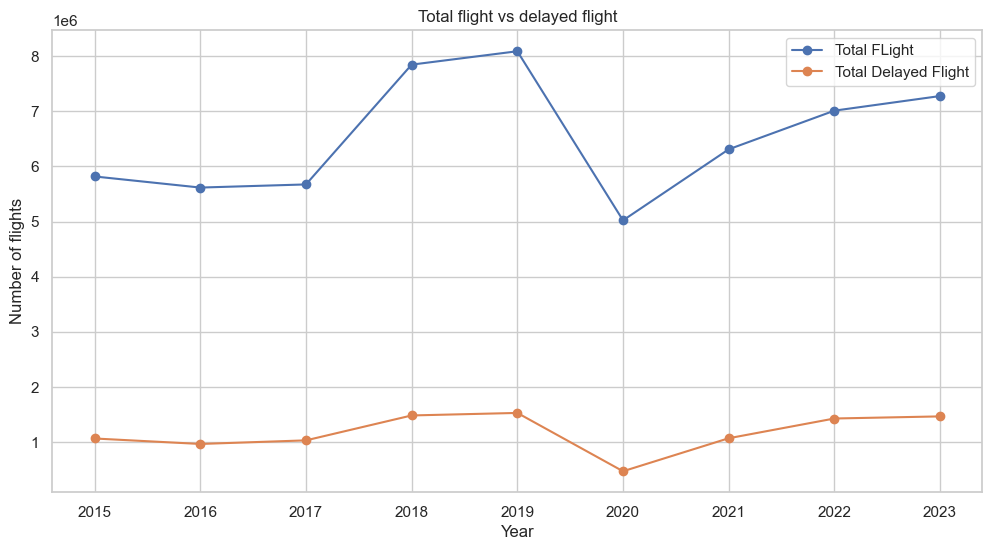

In [20]:
plt.figure(figsize=(12,6))
plt.plot(yearly['year'],yearly['arr_flights'],label='Total FLight', marker = 'o')
plt.plot(yearly['year'],yearly['arr_del15'],label = 'Total Delayed Flight',marker = 'o')
plt.title('Total flight vs delayed flight')
plt.ylabel('Number of flights')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\61662139.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


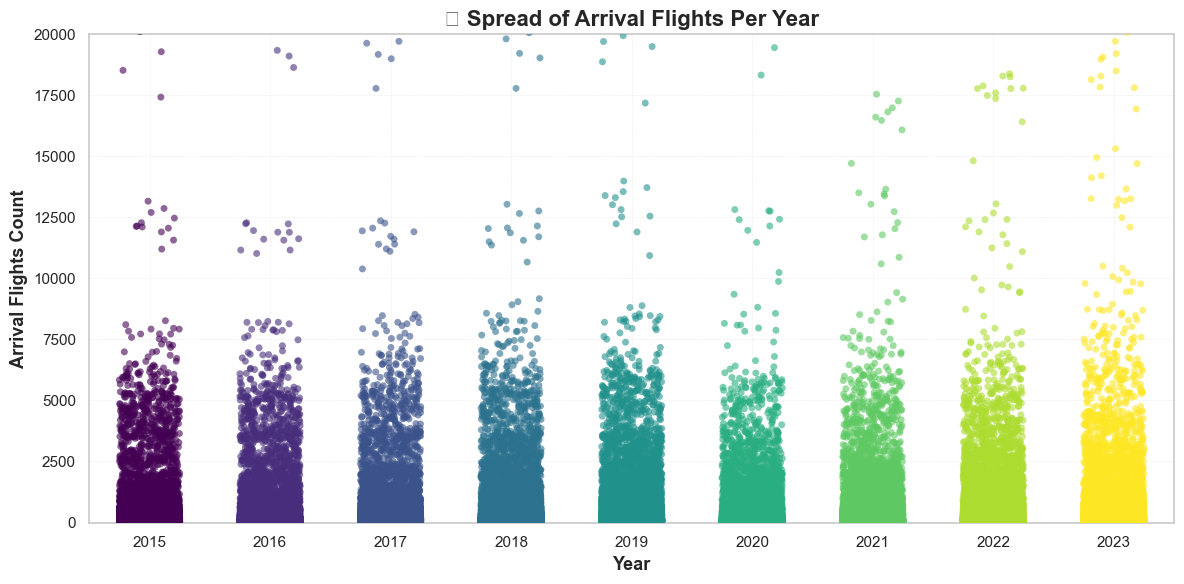

In [21]:
sns.set_theme(style="whitegrid")

# Plot setup
plt.figure(figsize=(12, 6))

sns.stripplot(
    data=data,
    x='year',
    y='arr_flights',
    hue='year',                  # To maintain color by year
    palette='viridis',           # New, visually appealing colormap
    dodge=False,
    alpha=0.6,                   # Slightly more visible
    size=5,                      # Slightly larger dots
    jitter=0.25,
    legend=False                 # Hide redundant legend
)

# Labels and formatting
plt.ylim(-50, 20000)
plt.title('📊 Spread of Arrival Flights Per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Arrival Flights Count', fontsize=13, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

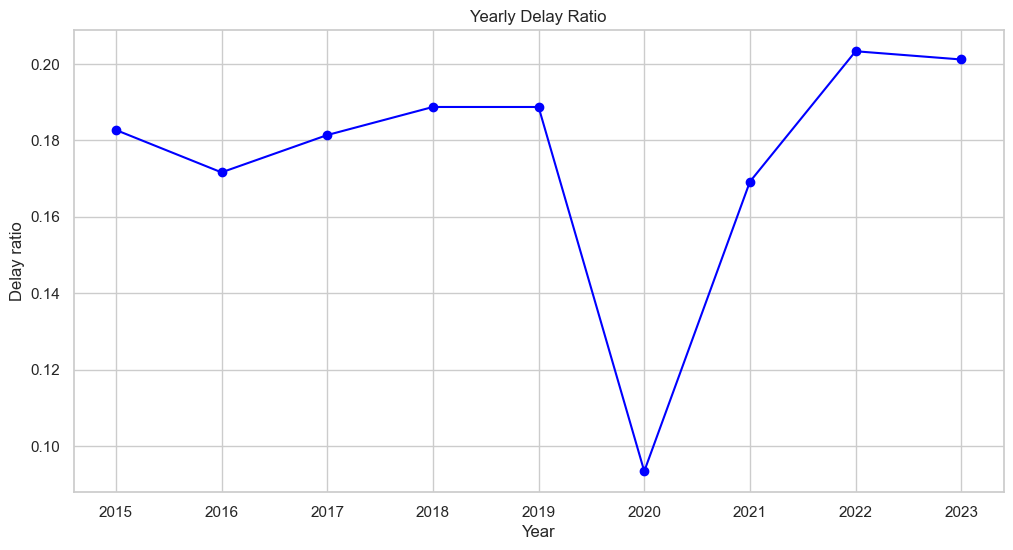

In [22]:
plt.figure(figsize=(12,6))
plt.plot(yearly['year'],yearly['delay_ratio'],color = 'blue', marker = 'o')
plt.title('Yearly Delay Ratio')
plt.xlabel('Year')
plt.ylabel('Delay ratio')
plt.grid(True)
plt.show()

📈 Overall Trend

    Delay ratio fluctuated between 0.17–0.19 from 2015 to 2019.

    Sharp dip in 2020 (to ~0.093) due to pandemic-related flight reductions.

    Significant spike post-2020, peaking in 2022 (highest delay ratio ~0.204).

🔍 Year-wise Highlights

    🔻2020: Lowest delay ratio — reduced air traffic led to fewer delays and smoother operations.

    🔺2022: Highest delay ratio — operational challenges in post-pandemic recovery likely worsened on-time performance.

    2023: Slight improvement from 2022 but still higher than pre-COVID years.

📌 Insight Summary

    Low traffic ≠ high delays → In 2020, minimal flights meant minimal delays.

    Return to traffic without efficiency → Rising delays after 2020 suggest gaps in preparedness during traffic recovery.

    Need for optimization → Despite fewer flights than 2019, 2022 had worse delay performance, indicating systemic inefficiencies.

In [23]:
count_col = ['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']
delay_col = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

In [24]:
yearly_delay_min=data.groupby('year')[delay_col].sum().reset_index()

In [26]:
yearly_delay_count=data.groupby('year')[count_col].sum().reset_index()

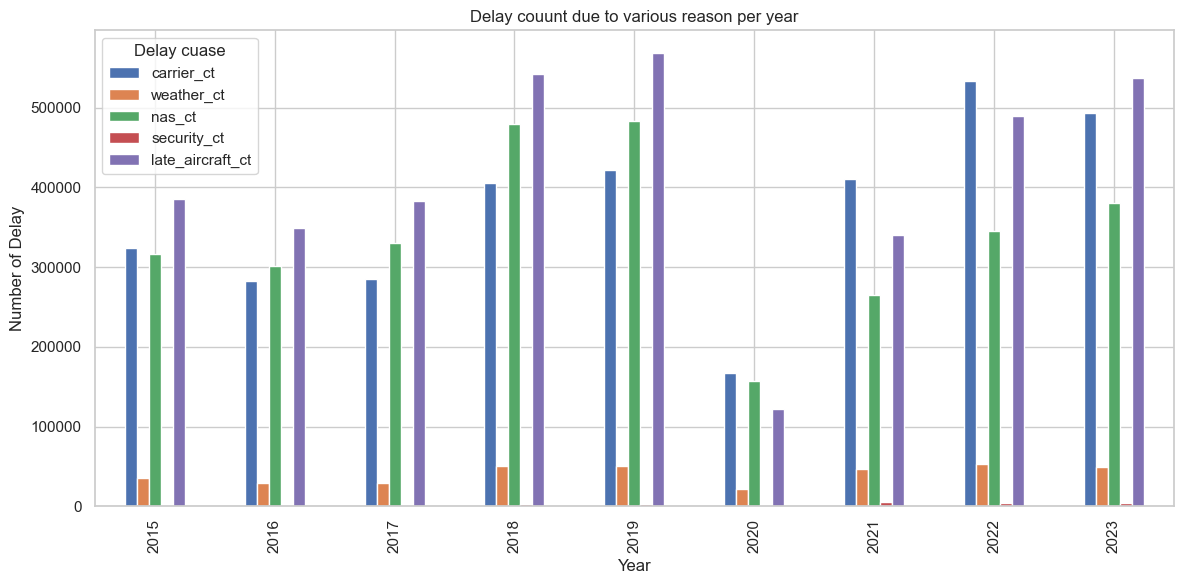

In [27]:
yearly_delay_count.set_index('year').plot(kind = 'bar' , stacked = False , figsize = (12,6))
plt.title('Delay couunt due to various reason per year')
plt.xlabel('Year')
plt.ylabel('Number of Delay')
plt.legend(title='Delay cuase')
plt.tight_layout()
plt.show()

📊 Key Observations:
1. Late Aircraft Delay (Purple)

    Most dominant cause of delays across all years (especially 2018–2019, 2022–2023).

    Indicates downstream delays — when one delayed flight leads to a chain reaction.

2. Carrier Delay (Blue)

    Consistently high and peaks in 2022, likely due to internal airline issues (e.g., staffing, scheduling, maintenance).

    Matches or surpasses late aircraft delays in some years.

3. NAS Delay (Green)

    Air traffic system–related delays show substantial contribution, especially in 2018–2019.

    Dropped in 2020 due to reduced flights, then rebounded.

4. Weather Delay (Orange)

    Remains comparatively low and stable across years.

    Slight increase in 2022–2023, but not a major contributor.

5. Security Delay (Red)

    Minimal impact throughout the period.

    Barely visible — contributes negligibly to total delays.

🧠 Summary Insights:

    Late aircraft & carrier delays are the top 2 causes, needing priority action.

    2020 shows major dip across all causes due to the COVID-19 pandemic.

    Delays rebounded post-2021, with 2022 seeing a sharp rise, reflecting operational recovery challenges.

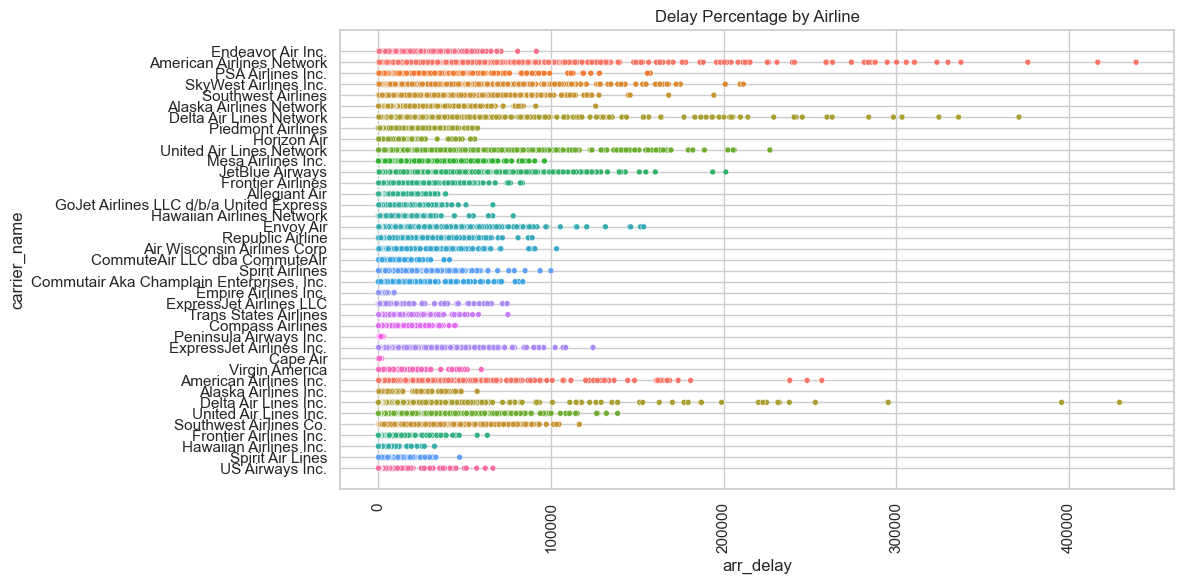

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y="carrier_name", x="arr_delay", size=3, hue="carrier", legend=False, data=data)
plt.title('Delay Percentage by Airline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

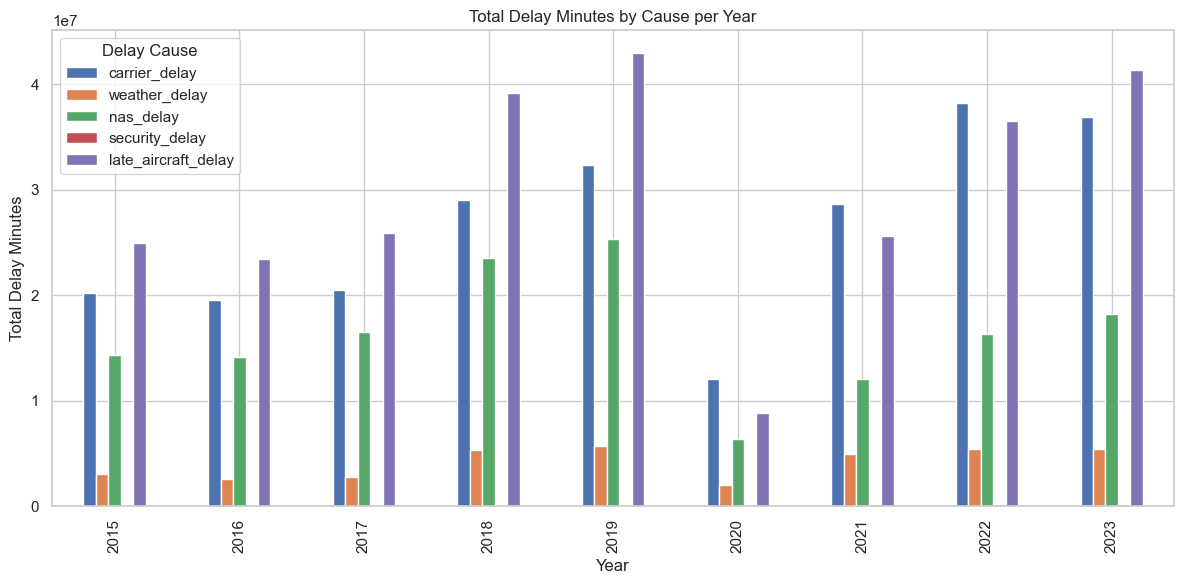

In [29]:
yearly_delay_min.set_index('year').plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Total Delay Minutes by Cause per Year")
plt.ylabel("Total Delay Minutes")
plt.xlabel("Year")
plt.legend(title="Delay Cause")
plt.tight_layout()
plt.show()

📊 Key Observations:
1. 🟪 Late Aircraft Delay

    Highest contributor to total delay minutes in all years.

    Peaked in 2019 and 2023, both exceeding 40 million minutes.

    Reflects cascading delays — one late flight disrupts many.

2. 🔵 Carrier Delay

    Second-largest contributor overall.

    Surged post-pandemic, with 2022 at its peak (~41 million minutes).

    Points to airline-specific issues like staffing, maintenance, or operational inefficiencies.

3. 🟩 NAS Delay (Air Traffic Control/System)

    Moderate but consistent impact.

    Notable rise in 2018–2019, slight dip in 2020 (COVID), then recovery in 2022–2023.

4. 🟧 Weather Delay

    Comparatively lower than other causes, but consistent across all years.

    Slight increases in 2022–2023, showing weather remains a persistent challenge.

5. 🔴 Security Delay

    Negligible contribution every year.

    Operational security measures do not significantly affect total delay time.

🧠 Insight Summary:

    Late aircraft and carrier delays dominate delay minutes, highlighting systemic and airline-level inefficiencies.

    2020 shows the lowest delays due to minimal flights during COVID-19.

    Post-2021 delay minutes surged, especially for carrier and late aircraft reasons — recovery challenges evident.

    Investments in turnaround efficiency, fleet scheduling, and delay buffering could yield substantial improvements.

In [30]:
delay_count_per_delayed_flight = yearly_delay_count.copy()
for col in count_col :
  delay_count_per_delayed_flight[f'{col}_ratio_delayed'] = yearly_delay_count[f'{col}']/yearly['arr_del15']

In [31]:
delay_count_per_total_flight = yearly_delay_count.copy()
for col in count_col:
  delay_count_per_total_flight[f'{col}_ratio_total'] = yearly_delay_count[col]/yearly['arr_flights']

In [32]:
delay_minutes_per_flight = yearly_delay_min.copy()
for col in delay_col :
  delay_minutes_per_flight[f'{col}_per_flight'] = yearly_delay_min[f'{col}']/yearly['arr_flights']

In [33]:
delay_minutes_ratio_delayed = yearly_delay_min.copy()
for col in delay_col:
  delay_minutes_ratio_delayed[f'{col}_cause'] = yearly_delay_min[f'{col}']/yearly['arr_del15']

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\3258226388.py:23: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


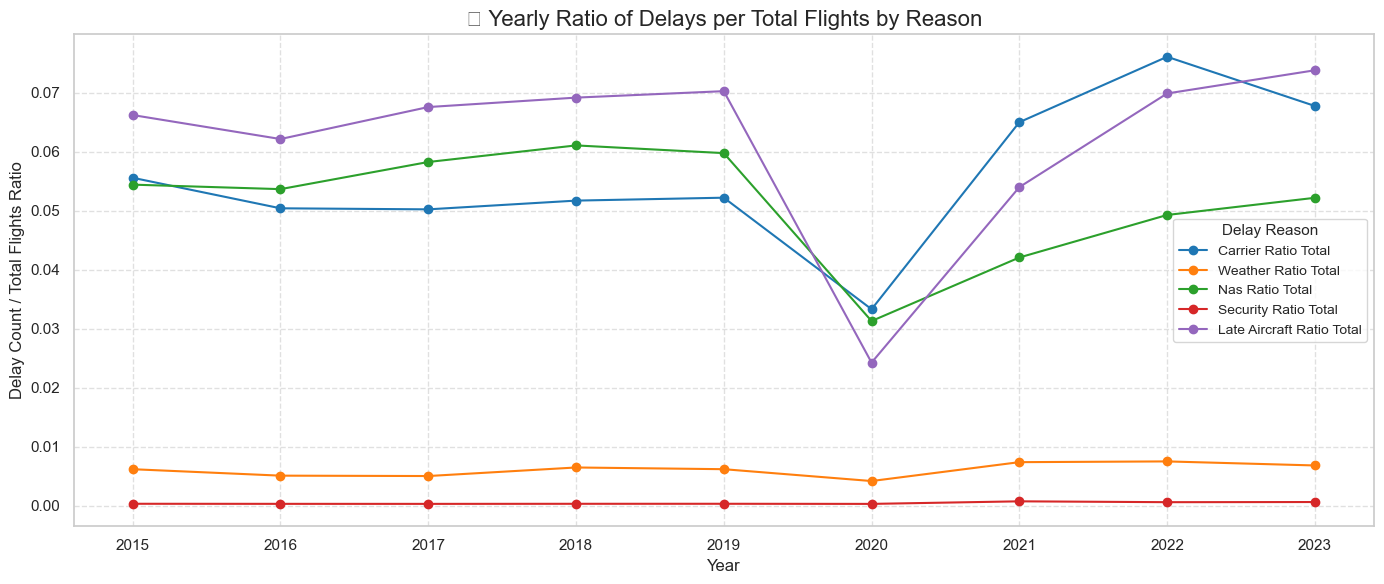

In [34]:
plt.figure(figsize=(14, 6))
# plt.style.use('seaborn-whitegrid')

delay_reasons = delay_count_per_total_flight.columns[-5:].tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  

for i, reason in enumerate(delay_reasons):
    readable_label = reason.replace('_ct', '').replace('_', ' ').title()
    plt.plot(
        delay_count_per_total_flight['year'],
        delay_count_per_total_flight[reason],
        marker='o',
        label=readable_label,
        color=colors[i]
    )

plt.title('📉 Yearly Ratio of Delays per Total Flights by Reason', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay Count / Total Flights Ratio', fontsize=12)
plt.legend(title="Delay Reason", fontsize=10, title_fontsize=11)
plt.xticks(delay_count_per_total_flight['year'].unique()) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\3009904136.py:31: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


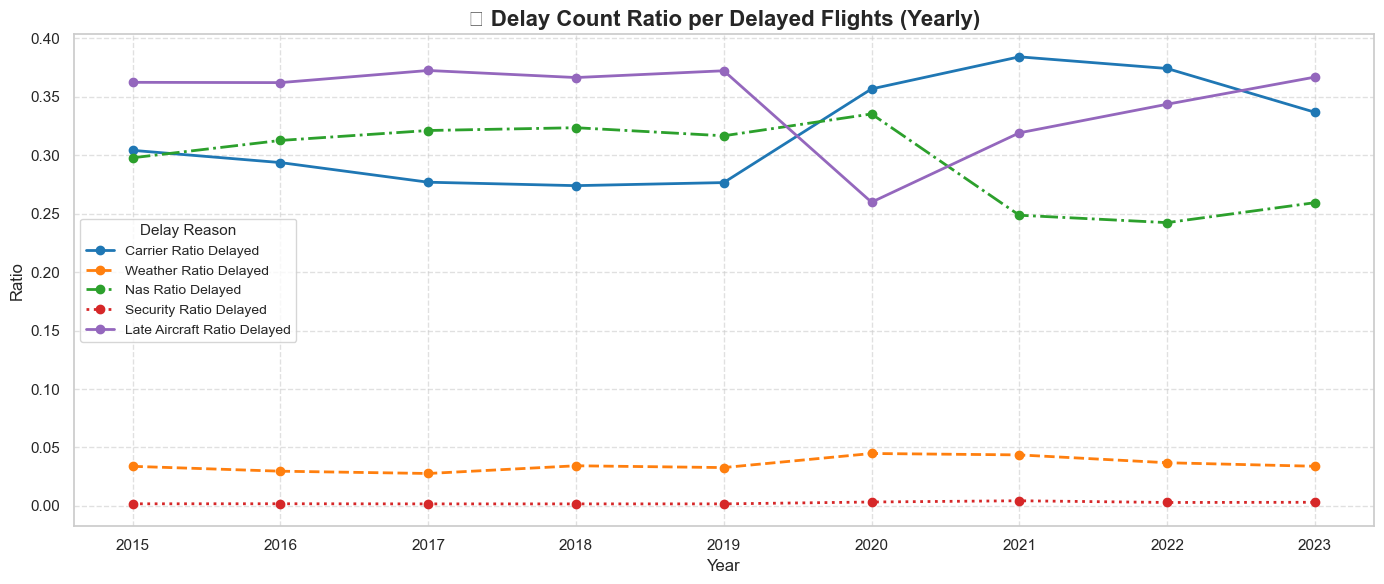

In [35]:
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(14, 6))

# Define custom colors and line styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
line_styles = ['-', '--', '-.', ':', '-']

# Loop through each delay reason and plot with style
delay_reasons = delay_count_per_delayed_flight.columns[-5:].tolist()
for i, reason in enumerate(delay_reasons):
    readable_label = reason.replace('_ct', '').replace('_', ' ').title()
    plt.plot(
        delay_count_per_delayed_flight['year'],
        delay_count_per_delayed_flight[reason],
        marker='o',
        linestyle=line_styles[i],
        linewidth=2,
        color=colors[i],
        label=readable_label
    )

# Customize titles and labels
plt.title('🛫 Delay Count Ratio per Delayed Flights (Yearly)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.xticks(delay_count_per_delayed_flight['year'].unique())
plt.legend(title="Delay Reason", fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [36]:
monthly_delay_min=data.groupby('month')[delay_col].sum().reset_index()


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\1211588249.py:20: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


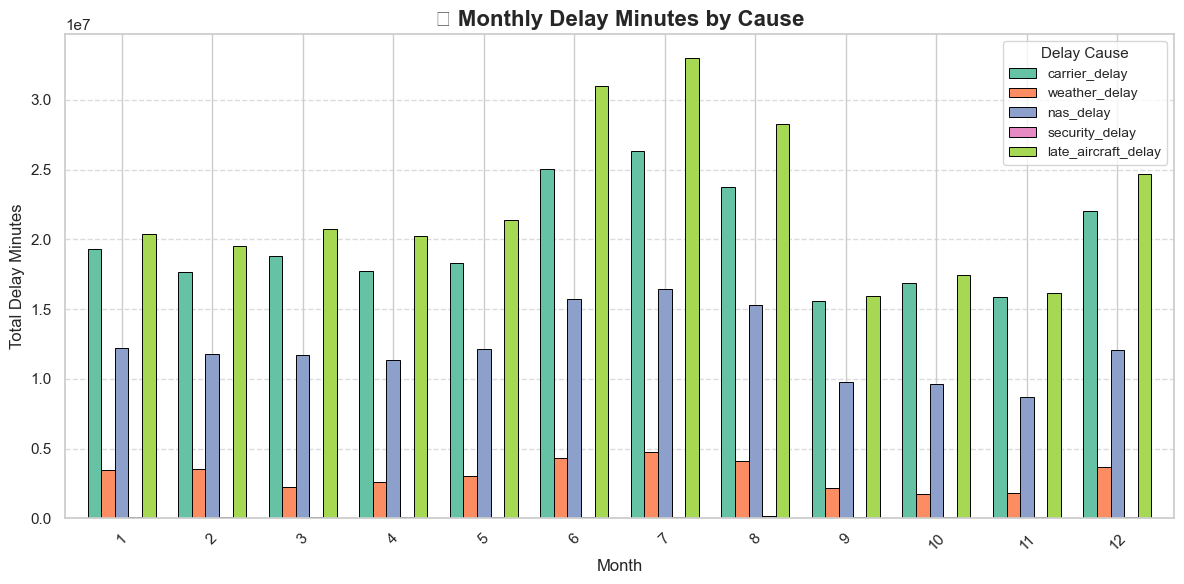

In [37]:

sns.set_palette("Set2")  # Use a clean and distinct color palette

# Create the bar plot
ax = monthly_delay_min.set_index('month').plot(
    kind='bar',
    stacked=False,
    figsize=(12, 6),
    width=0.75,
    edgecolor='black',
    linewidth=0.7
)

# Customize plot elements
plt.title("📅 Monthly Delay Minutes by Cause", fontsize=16, fontweight='bold')
plt.ylabel("Total Delay Minutes", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Delay Cause", fontsize=10, title_fontsize=11)
plt.tight_layout()

# Display the plot
plt.show()


📊 Monthly Delay Minutes by Cause – Key Insights

    Consistent Delay Trends Across Months
    Most delay causes show a relatively stable trend across months, without any extreme spikes, indicating delays are a year-round issue.

    🔧 Late Aircraft Delay is the Dominant Cause
    Across all months, late aircraft delays consistently contribute the highest share of total delay minutes. This highlights a systemic issue in aircraft turnaround or scheduling.

    🛩️ Carrier Delays Are Also Significant
    Carrier-related delays (issues within the airline's control like staffing, maintenance, etc.) are the second highest, indicating internal operational       inefficiencies.

    🌩️ Weather Delays Are Seasonal
    Weather-related delays show visible increases during certain months, possibly winter (fog/snow) or summer (storms), reflecting seasonal impact.

    🛂 Security Delays Are Minimal
    Security delays consistently contribute the least, indicating that TSA or airport security processes are not a major cause of delays.

    📈 NAS Delays (Airspace issues)
    These stay moderate and stable, implying air traffic control limitations may need structural improvements over time.



In [46]:
monthly_delay_count=data.groupby('month')[count_col].sum().reset_index()

In [47]:
monthly = data.groupby('month')[['arr_flights','arr_del15']].sum().reset_index()
monthly['delay_ratio_total'] = monthly['arr_del15'] / monthly['arr_flights']

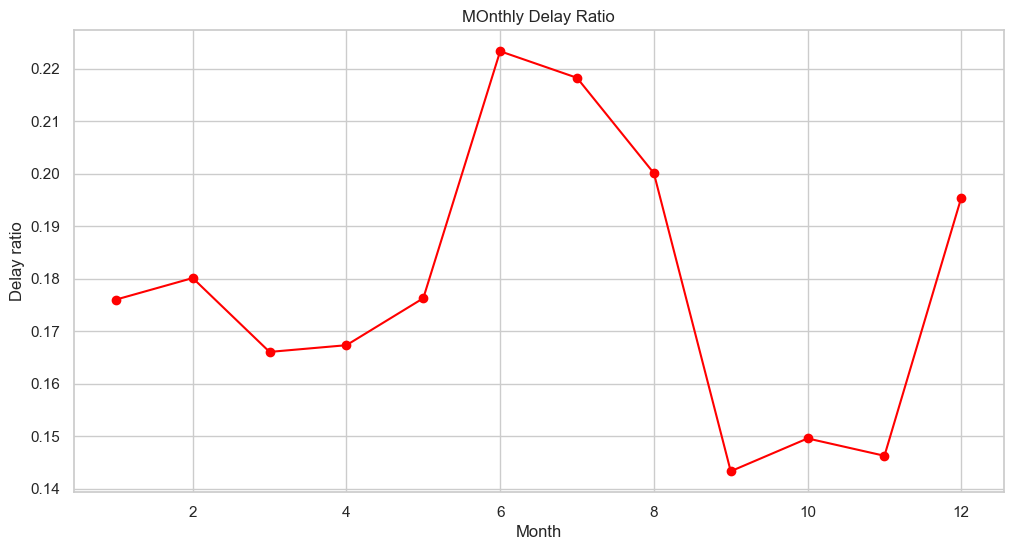

In [48]:
plt.figure(figsize=(12,6))
plt.plot(monthly['month'],monthly['delay_ratio_total'],color = 'red', marker = 'o')
plt.title('MOnthly Delay Ratio')
plt.xlabel('Month')
plt.ylabel('Delay ratio')
plt.grid(True)
plt.show()

Key Observations

    Highest Delay Ratios:

        The delay ratio peaks in June and July, reaching above 0.22. This suggests that mid-year months experience the most significant delays, possibly due to increased travel demand during the summer season or operational challenges.

    Lowest Delay Ratios:

        The lowest delay ratios are observed in September and November, dropping to around 0.14–0.15. These months may benefit from lower passenger volumes or more stable weather conditions.

    End-of-Year Increase:

        There is a noticeable rise in the delay ratio in December, which could be attributed to holiday travel surges and potential weather disruptions.

    General Trend:

        The delay ratio remains relatively stable from January to May, then increases sharply in the summer, decreases in the fall, and rises again at the end of the year.


In [49]:
# Ratio of per flight
for col in count_col:
  monthly_delay_count[f'{col}_ratio_total'] = monthly_delay_count[col]/monthly['arr_flights']

# Ratio of per delayed
for col in count_col :
  monthly_delay_count[f'{col}_ratio_delayed'] = monthly_delay_count[f'{col}']/monthly['arr_del15']

# Ratio of per flight
for col in delay_col:
  monthly_delay_min[f'{col}_per_flight']  = monthly_delay_min[f'{col}']/monthly['arr_flights']

# Ratio of per delayed
for col in delay_col:
  monthly_delay_min[f'{col}_cause'] = monthly_delay_min[f'{col}']/monthly['arr_del15']


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\4277574913.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


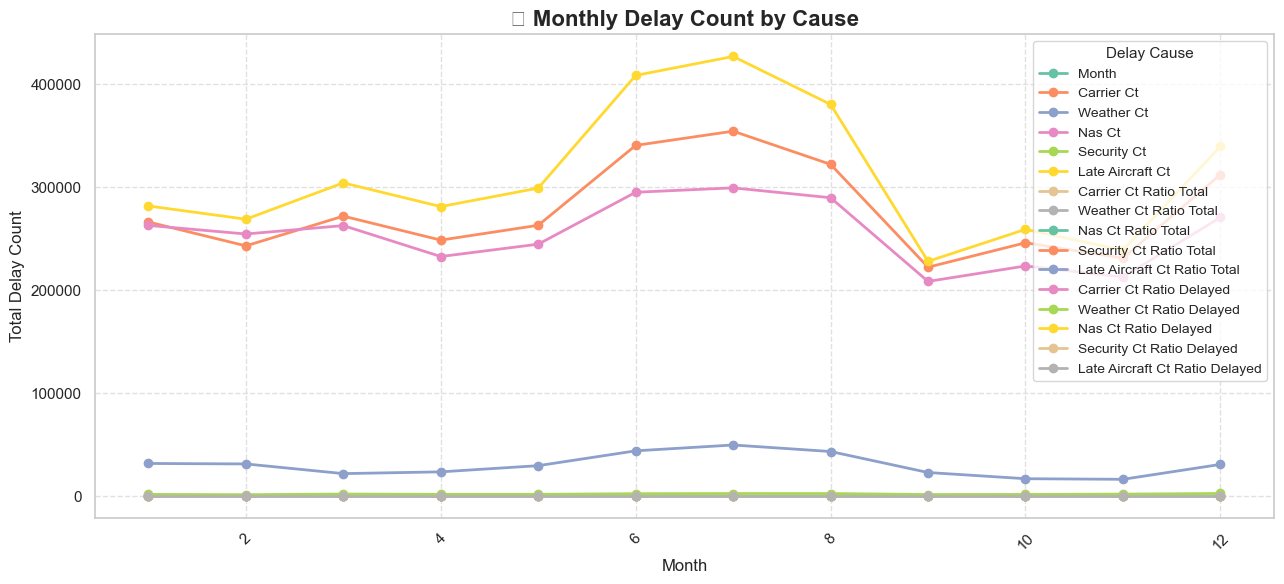

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13, 6))

# Define a color palette
colors = sns.color_palette("Set2", n_colors=len(monthly_delay_count.columns))

# Plot each delay cause as a line
for i, cause in enumerate(monthly_delay_count.columns):
    plt.plot(
        monthly_delay_count['month'],
        monthly_delay_count[cause],
        marker='o',
        linestyle='-',
        linewidth=2,
        color=colors[i],
        label=cause.replace('_', ' ').title()
    )

# Customize plot
plt.title("📈 Monthly Delay Count by Cause", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Delay Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Delay Cause", fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
data['year_month'] = pd.to_datetime(data[['year', 'month']].assign(day=1))


In [52]:
year_month_df = data.groupby('year_month').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'security_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()


In [53]:
# Ratio of delayed flights
year_month_df['delay_ratio'] = year_month_df['arr_del15'] / year_month_df['arr_flights']

# Delay minutes per flight
for col in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    year_month_df[f'{col}_min_per_flight'] = year_month_df[f'{col}_delay'] / year_month_df['arr_flights']
    year_month_df[f'{col}_ct_per_flight'] = year_month_df[f'{col}_ct'] / year_month_df['arr_flights']
    year_month_df[f'{col}_ct_ratio'] = year_month_df[f'{col}_ct'] / year_month_df['arr_del15']
    year_month_df[f'{col}_min_ratio'] = year_month_df[f'{col}_delay'] / year_month_df['arr_del15']


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\1873097315.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


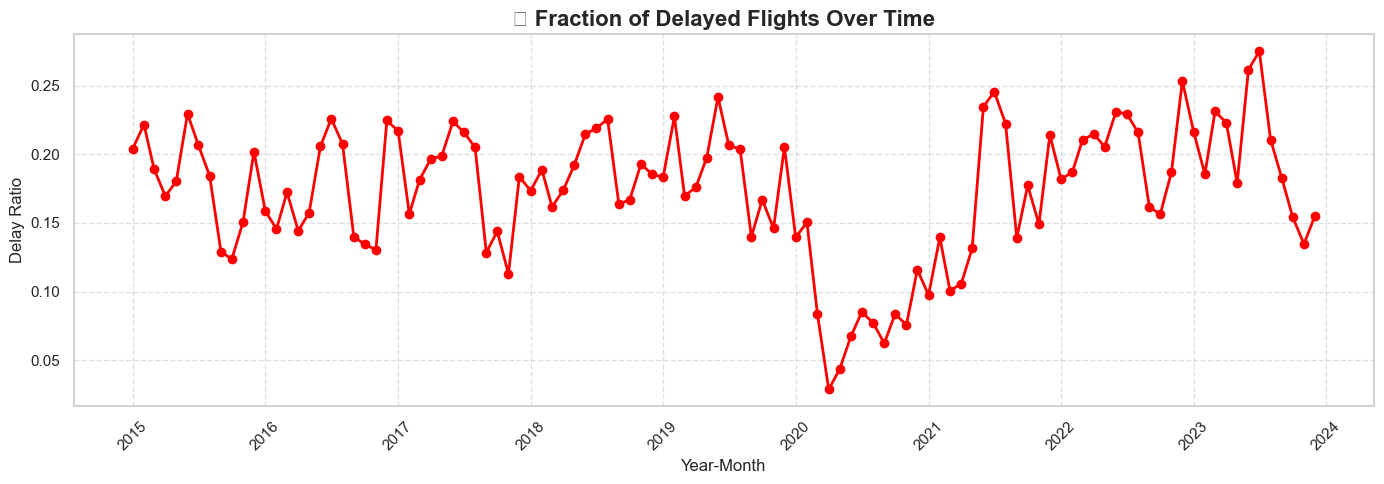

In [54]:
plt.figure(figsize=(14, 5))

# Plot delay ratio over time
plt.plot(
    year_month_df['year_month'],
    year_month_df['delay_ratio'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='red',
    label='Delay Ratio'
)

# Improve readability of x-axis (rotate for date-style axis)
plt.xticks(rotation=45)

# Add titles and labels
plt.title("📈 Fraction of Delayed Flights Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Delay Ratio", fontsize=12)

# Add grid and layout tweaks
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

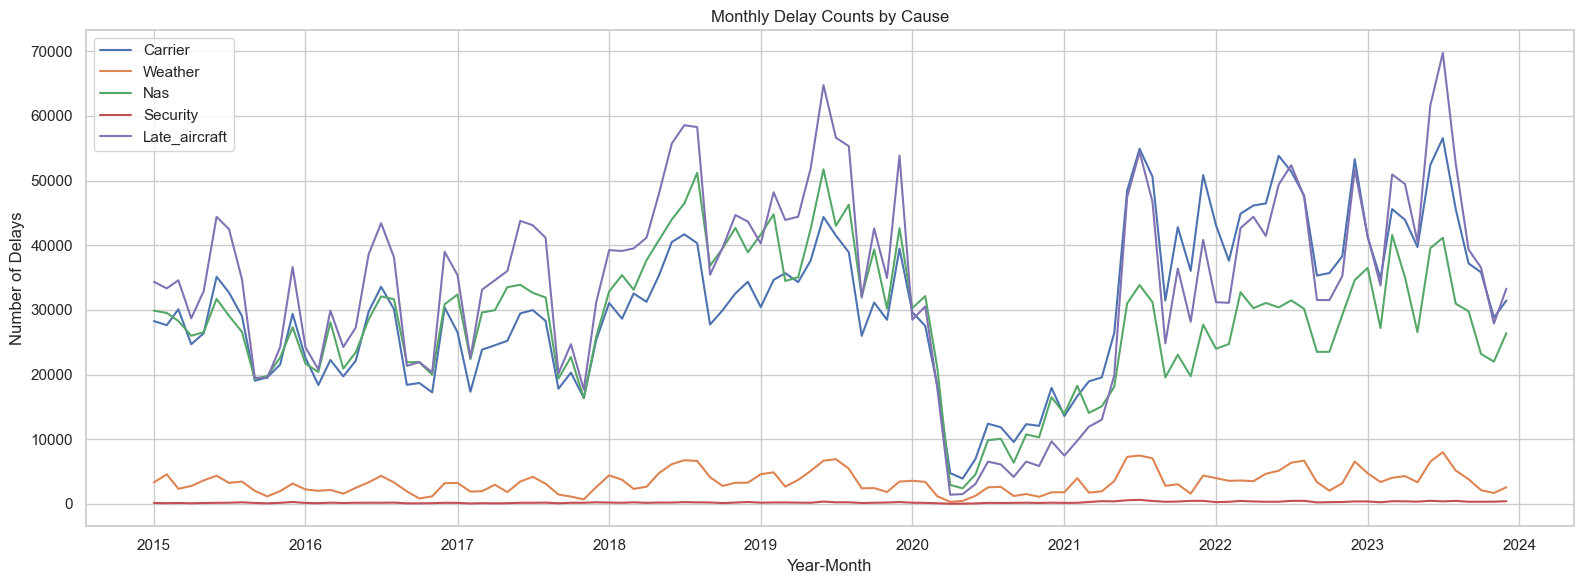

In [55]:
plt.figure(figsize=(16, 6))
for col in ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']:
    plt.plot(year_month_df['year_month'], year_month_df[col], label=col.replace('_ct','').capitalize())
plt.title("Monthly Delay Counts by Cause")
plt.xlabel("Year-Month")
plt.ylabel("Number of Delays")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


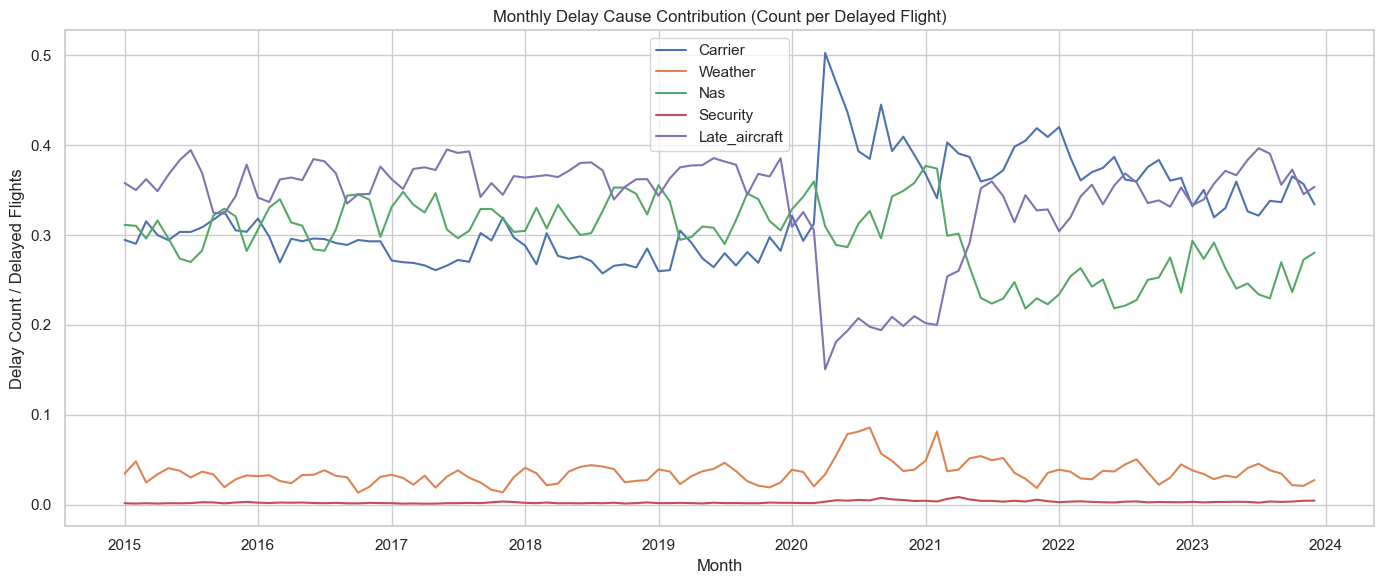

In [56]:
plt.figure(figsize=(14, 6))

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    plt.plot( year_month_df['year_month'], year_month_df[f'{cause}_ct_ratio'], label=cause.capitalize())

plt.title('Monthly Delay Cause Contribution (Count per Delayed Flight)')
plt.xlabel('Month')
plt.ylabel('Delay Count / Delayed Flights')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
airport_summary = data.groupby('airport')[['arr_flights','arr_del15']].sum().reset_index()

In [58]:
airport_summary['delay_ratio']= airport_summary['arr_del15']/airport_summary['arr_flights']
airport_summary.sort_values(by='delay_ratio',ascending=False).head(5)


,airport,arr_flights,arr_del15,delay_ratio
391,YNG,2.0,2.0,1.000000
111,DUT,1613.0,655.0,0.406076
65,CDB,262.0,90.0,0.343511
52,BQN,16759.0,5421.0,0.323468
297,PSE,6452.0,1986.0,0.307812


In [59]:
airport_summary_min = data.groupby('airport')[delay_col].sum().reset_index()
airport_summary_min.head()

,airport,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ABE,174642.0,42530.0,66883.0,820.0,173273.0
1,ABI,38653.0,19096.0,22836.0,293.0,46256.0
2,ABQ,759851.0,84419.0,220373.0,3575.0,915894.0
3,ABR,27971.0,17389.0,4286.0,0.0,10045.0
4,ABY,40515.0,10277.0,9998.0,14.0,22250.0


In [60]:
airport_summary_count = data.groupby('airport')[count_col].sum().reset_index()
airport_summary_count.head()

,airport,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,ABE,2377.38,440.39,1559.50,11.04,2383.78
1,ABI,697.46,207.60,536.56,7.85,768.49
2,ABQ,14086.95,1011.73,5966.53,82.82,15445.83
3,ABR,326.64,101.19,108.77,0.00,132.41
4,ABY,534.67,75.43,230.71,0.61,365.62


In [61]:
airport_rca = airport_summary_count.copy()
total_delay_count = airport_rca[count_col].sum(axis=1)

for col in count_col:
    airport_rca[f'{col}_ratio'] = airport_rca[col] / total_delay_count

airport_rca.head()


,airport,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_ct_ratio,weather_ct_ratio,nas_ct_ratio,security_ct_ratio,late_aircraft_ct_ratio
0,ABE,2377.38,440.39,1559.50,11.04,2383.78,0.351056,0.065030,0.230283,0.001630,0.352001
1,ABI,697.46,207.60,536.56,7.85,768.49,0.314460,0.093600,0.241916,0.003539,0.346485
2,ABQ,14086.95,1011.73,5966.53,82.82,15445.83,0.384954,0.027648,0.163047,0.002263,0.422088
3,ABR,326.64,101.19,108.77,0.00,132.41,0.488244,0.151253,0.162584,0.000000,0.197919
4,ABY,534.67,75.43,230.71,0.61,365.62,0.442960,0.062492,0.191137,0.000505,0.302906


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\4071880614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airport', y='delay_ratio', data=top_ratio, palette='coolwarm')


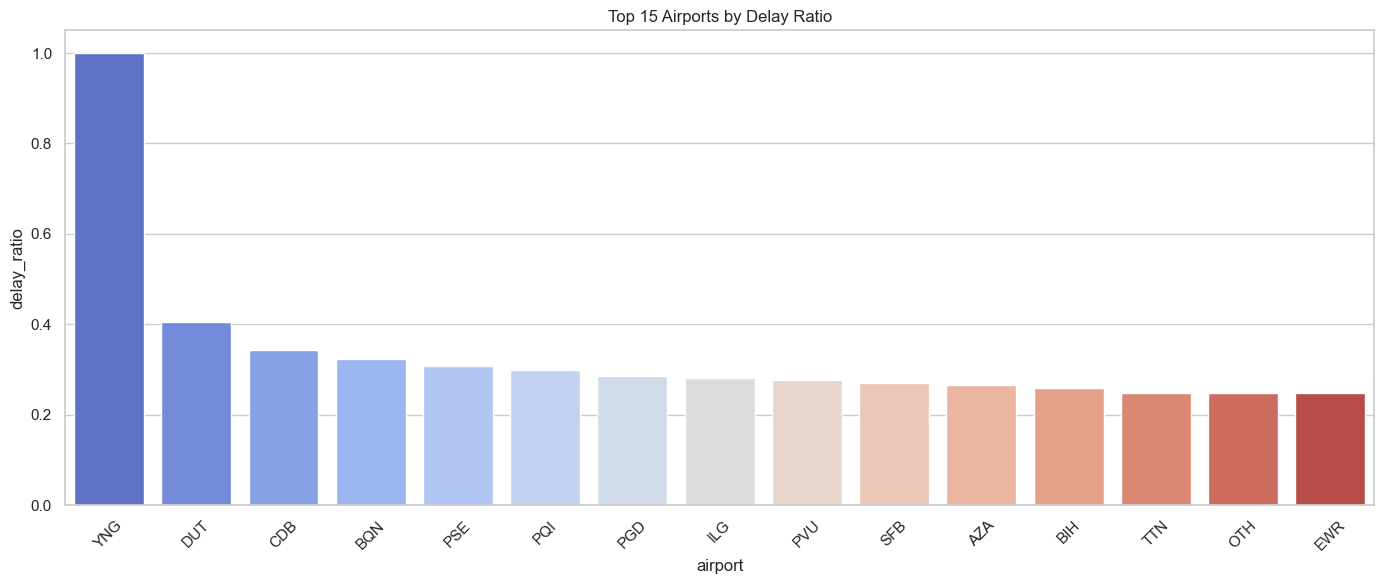

In [62]:
top_ratio = airport_summary.sort_values(by='delay_ratio', ascending=False).head(15)

plt.figure(figsize=(14,6))
sns.barplot(x='airport', y='delay_ratio', data=top_ratio, palette='coolwarm')
plt.title('Top 15 Airports by Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\2015404842.py:31: UserWarning: Glyph 9992 (\N{AIRPLANE}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\HP\AppData\Local\Temp\ipykernel_1528\2015404842.py:31: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9992 (\N{AIRPLANE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


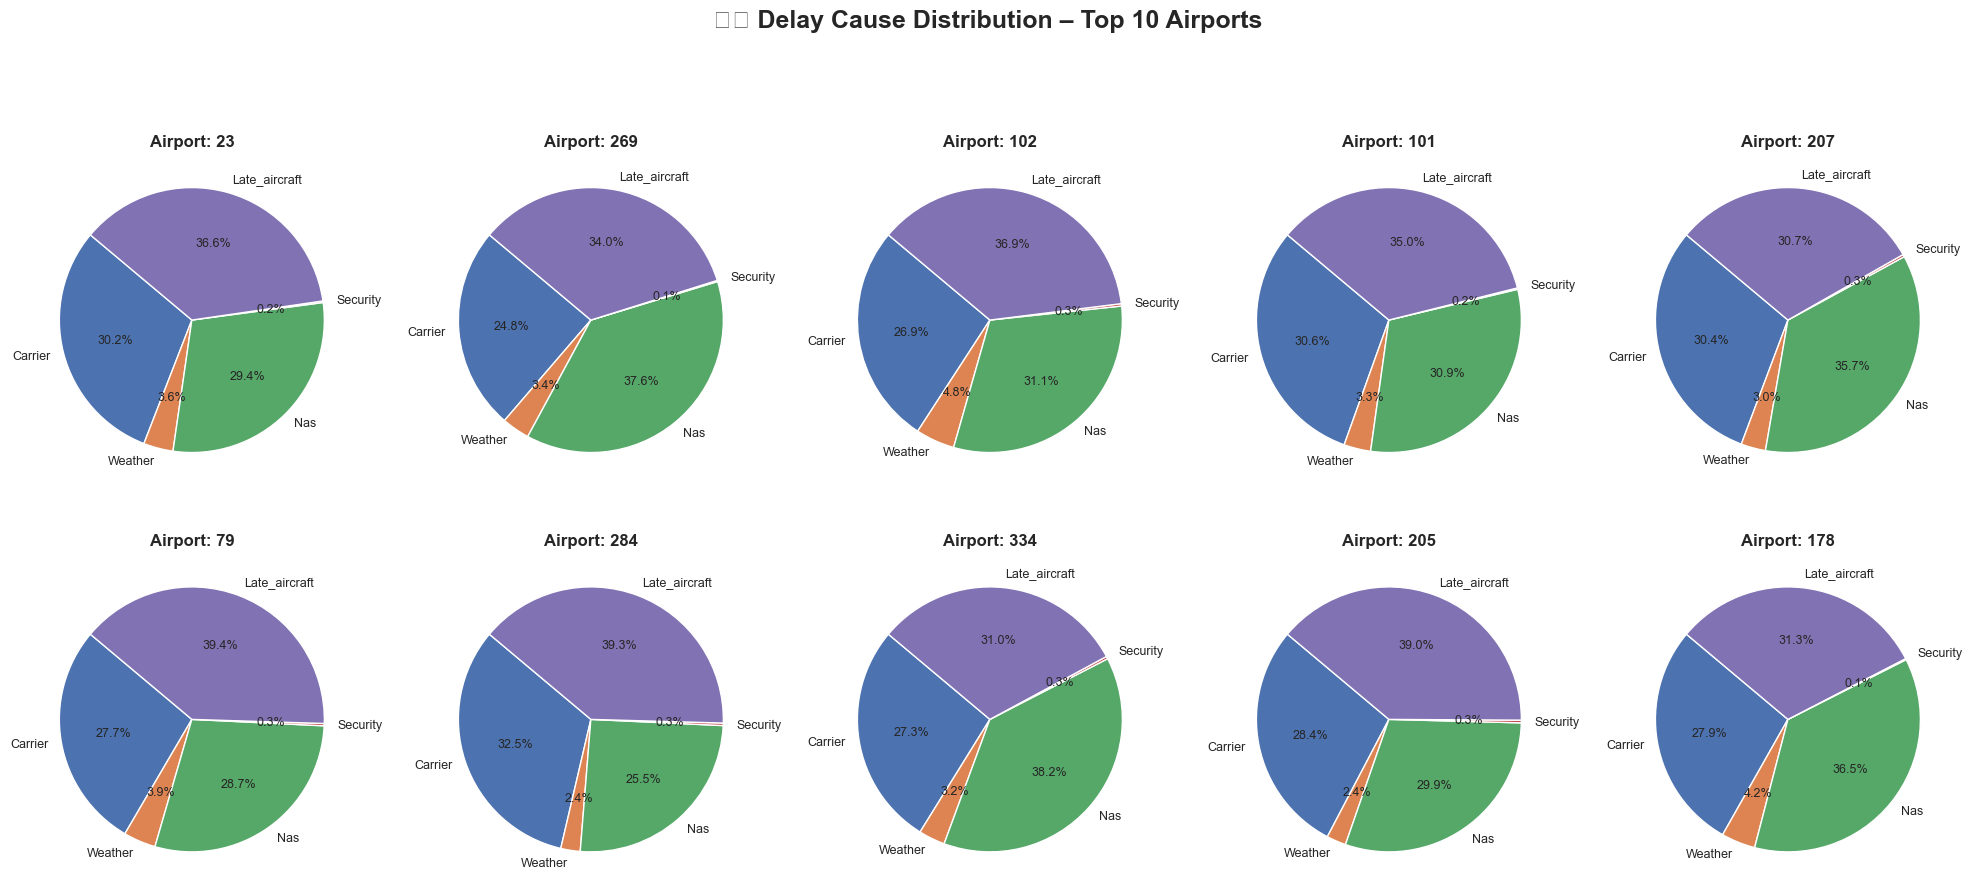

In [63]:


airport_delay_counts_ratio = airport_summary_count.copy()
airport_delay_counts_ratio['arr_flights'] = airport_summary['arr_flights']


count_col = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

for col in count_col:
    airport_delay_counts_ratio[f'{col}_ratio_total'] = airport_summary_count[col] / airport_summary['arr_flights']

top_airports_ratio = airport_delay_counts_ratio.sort_values(by='arr_flights', ascending=False).head(10)

cause_cols = [f'{c}_ratio_total' for c in count_col]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, (idx, row) in enumerate(top_airports_ratio.iterrows()):
    ratios = row[cause_cols]
    labels = [c.replace('_ratio_total', '').replace('_ct', '').capitalize() for c in count_col]
    
    axes[i].pie(
        ratios,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9}
    )
    axes[i].set_title(f"Airport: {row.name}", fontsize=12, fontweight='bold')

plt.suptitle("✈️ Delay Cause Distribution – Top 10 Airports", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\561815157.py:28: UserWarning: Glyph 128748 (\N{AIRPLANE ARRIVING}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128748 (\N{AIRPLANE ARRIVING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


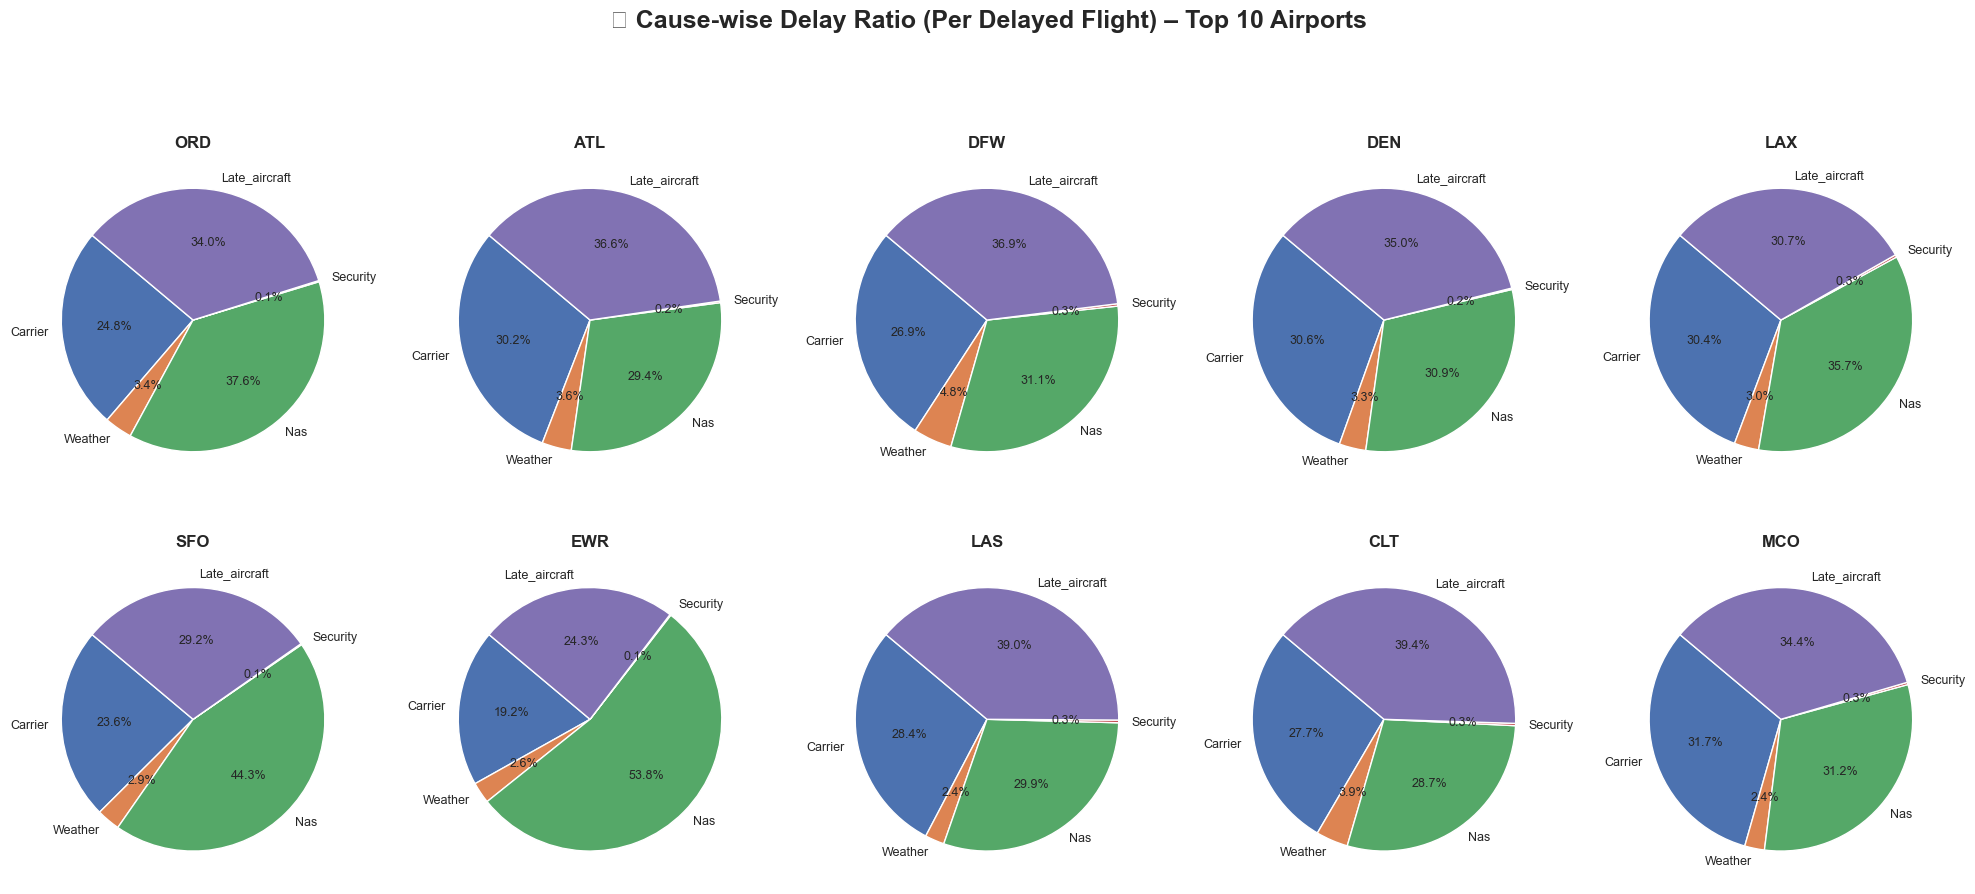

In [64]:


# Step 1: Prepare the RCA plot data
airport_rca_plot = airport_rca[['airport'] + [f'{c}_ratio' for c in count_col]].set_index('airport')
airport_rca_plot['arr_del15'] = airport_summary.set_index('airport')['arr_del15']
airport_rca_plot = airport_rca_plot.sort_values(by='arr_del15', ascending=False)

# Remove arr_del15 after sorting
airport_rca_plot.drop(columns=['arr_del15'], inplace=True)

top_rca_airports = airport_rca_plot.head(10)

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Cleaned labels for pie chart
labels = [c.replace('_ratio', '').replace('_ct', '').capitalize() for c in count_col]

for i, (airport, row) in enumerate(top_rca_airports.iterrows()):
    axes[i].pie(
        row.values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9}
    )
    axes[i].set_title(f"{airport}", fontsize=12, fontweight='bold')

plt.suptitle("🛬 Cause-wise Delay Ratio (Per Delayed Flight) – Top 10 Airports", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\2570192899.py:18: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_1528\2570192899.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


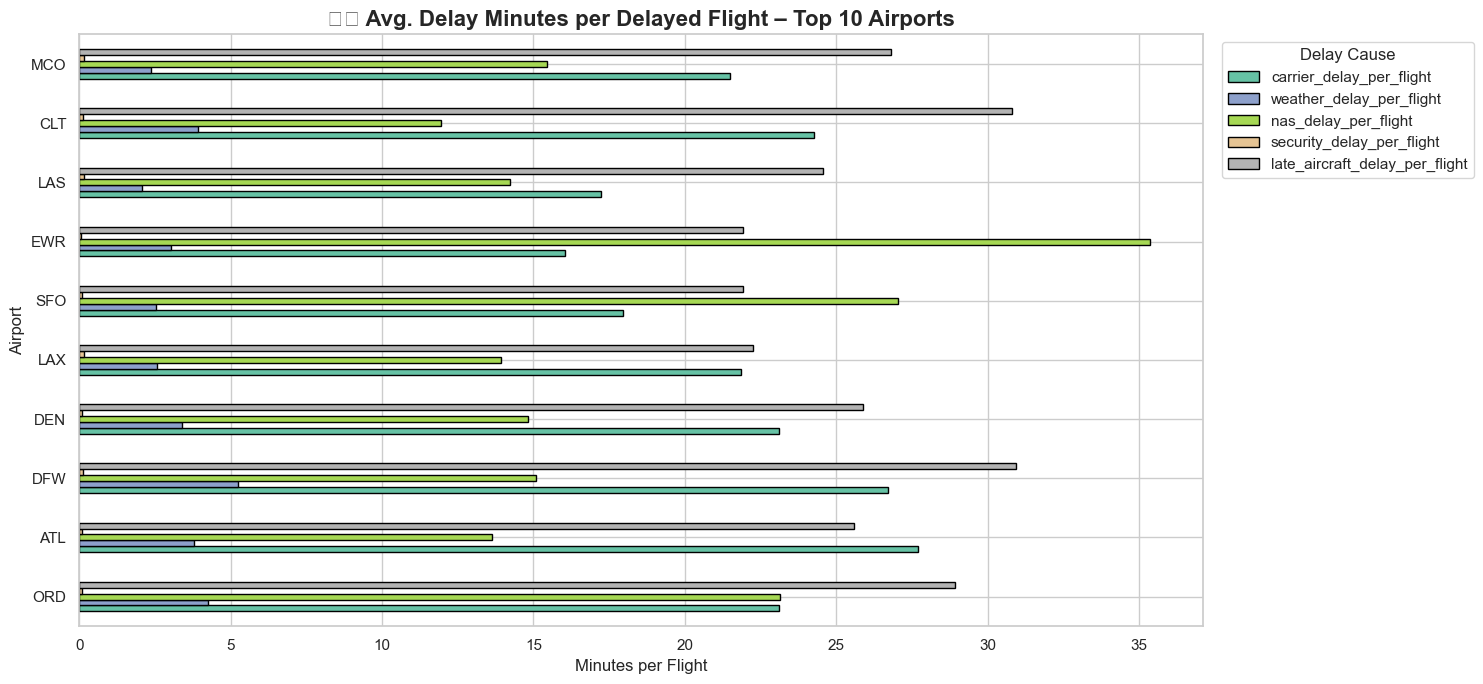

In [65]:

delay_min_ratio = airport_summary_min.copy()
for col in delay_col:
    delay_min_ratio[f'{col}_per_flight'] = airport_summary_min[col] / airport_summary['arr_del15']

delay_min_ratio['arr_del15'] = airport_summary['arr_del15']

delay_min_ratio = delay_min_ratio.sort_values(by='arr_del15', ascending=False).head(10)
delay_min_ratio.drop(columns=['arr_del15'], inplace=True)

plot_cols = [f'{c}_per_flight' for c in delay_col]
top_delay_min_plot = delay_min_ratio[['airport'] + plot_cols].set_index('airport')

top_delay_min_plot.plot(kind='barh', stacked=False, figsize=(15, 7), colormap='Set2', edgecolor='black')
plt.title('⏱️ Avg. Delay Minutes per Delayed Flight – Top 10 Airports', fontsize=16, fontweight='bold')
plt.xlabel('Minutes per Flight')
plt.ylabel('Airport')
plt.legend(title='Delay Cause', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


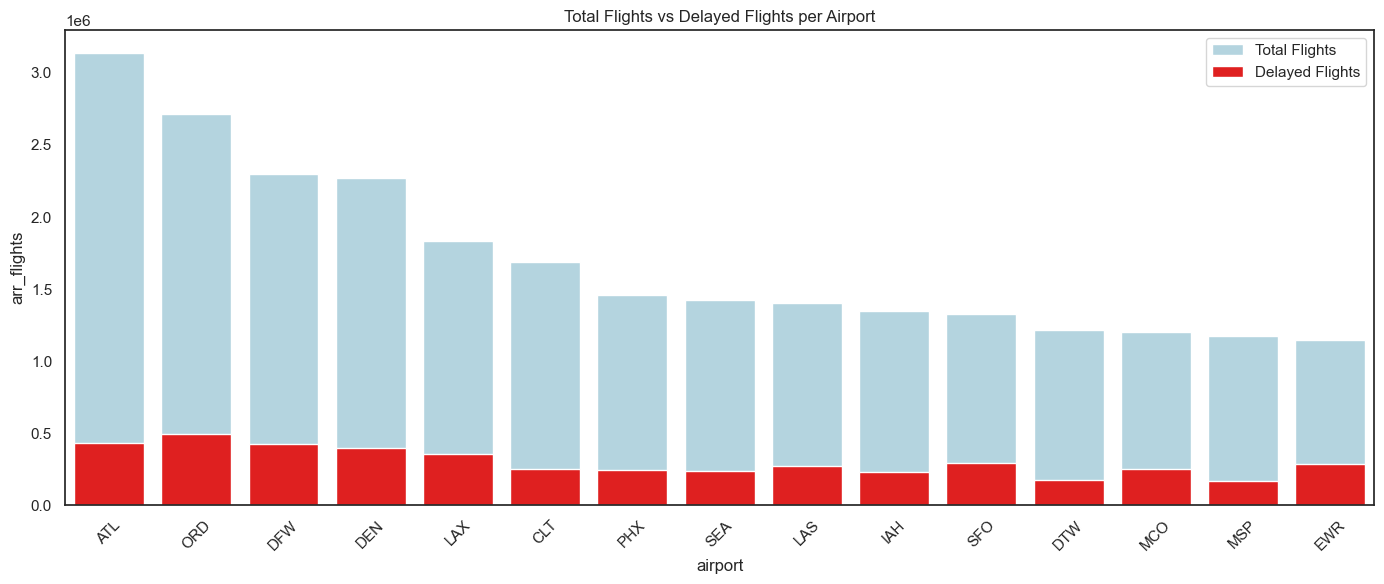

In [118]:
top_airports = airport_summary.sort_values(by='arr_flights', ascending=False).head(15)

plt.figure(figsize=(14,6))
sns.barplot(x='airport', y='arr_flights', data=top_airports, color='lightblue', label='Total Flights')
sns.barplot(x='airport', y='arr_del15', data=top_airports, color='red', label='Delayed Flights')
plt.title('Total Flights vs Delayed Flights per Airport')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
# Most delayed
print("Top 5 Most Delayed Airports:")
print(airport_summary.sort_values(by='delay_ratio', ascending=False).head(5))

# Least delayed
print("\nTop 5 Least Delayed Airports:")
print(airport_summary.sort_values(by='delay_ratio', ascending=True).head(5))


Top 5 Most Delayed Airports:
    airport  arr_flights  arr_del15  delay_ratio
391     YNG          2.0        2.0     1.000000
111     DUT       1613.0      655.0     0.406076
65      CDB        262.0       90.0     0.343511
52      BQN      16759.0     5421.0     0.323468
297     PSE       6452.0     1986.0     0.307812

Top 5 Least Delayed Airports:
    airport  arr_flights  arr_del15  delay_ratio
136     FNL          1.0        0.0     0.000000
196     JHM       3099.0      201.0     0.064860
318     ROP        151.0       10.0     0.066225
118     EKO       5165.0      371.0     0.071830
56      BTM       6052.0      465.0     0.076834


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\407740606.py:25: UserWarning: Glyph 9992 (\N{AIRPLANE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_1528\407740606.py:25: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9992 (\N{AIRPLANE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


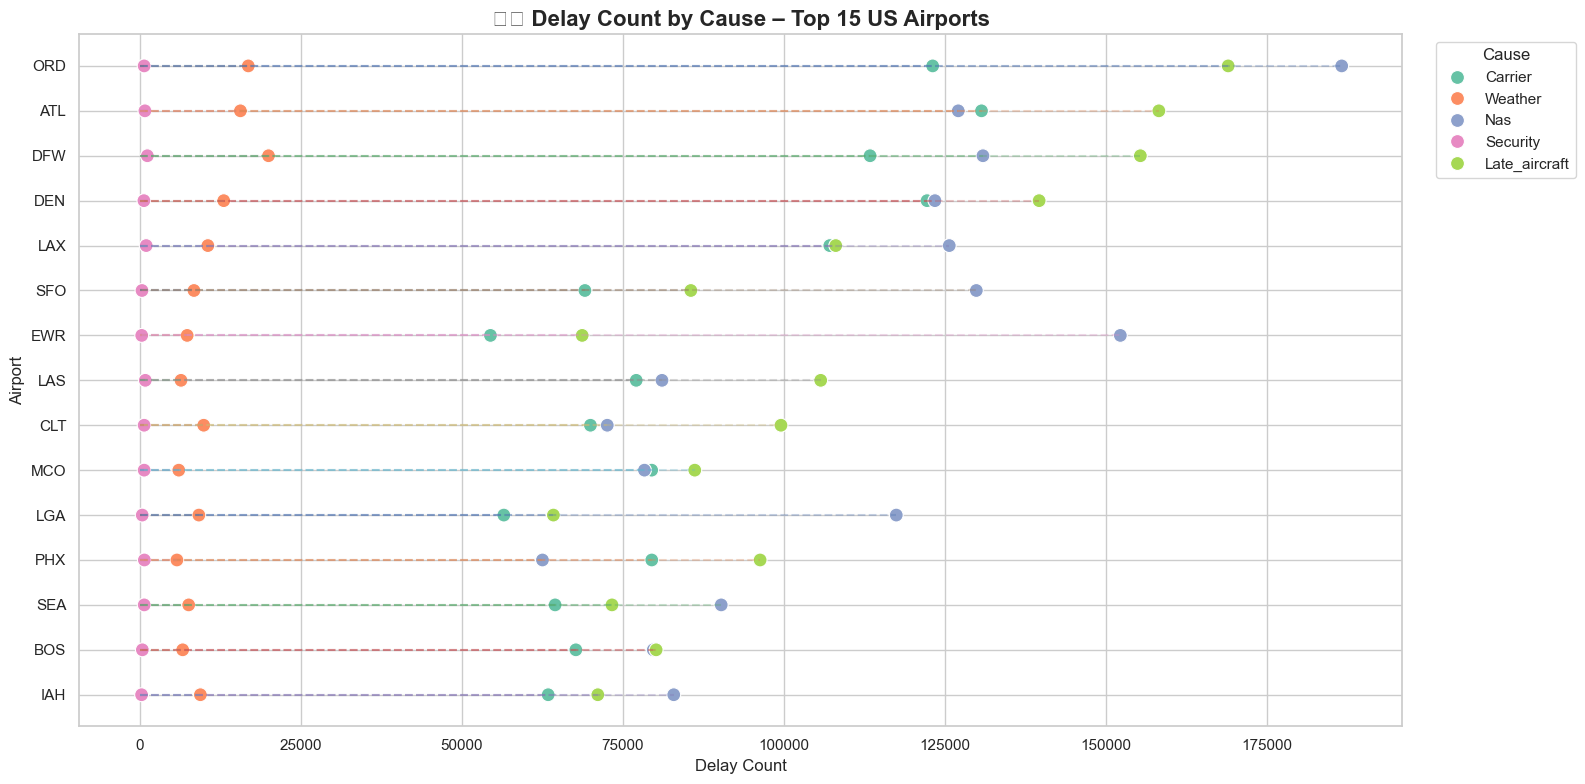

In [67]:


# Prepare data
airport_counts_plot = airport_summary_count.set_index('airport')[count_col]
top_counts_airports = airport_counts_plot.sum(axis=1).sort_values(ascending=False).head(15).index
plot_data = airport_counts_plot.loc[top_counts_airports]

# Transpose for horizontal lollipop per cause
plot_data = plot_data.reset_index().melt(id_vars='airport', var_name='Cause', value_name='Delays')

# Clean labels
plot_data['Cause'] = plot_data['Cause'].str.replace('_ct', '').str.capitalize()

# Plotting
plt.figure(figsize=(16, 8))
sns.scatterplot(data=plot_data, x='Delays', y='airport', hue='Cause', s=100, palette='Set2')

# Lollipop lines
for i in range(len(plot_data)):
    plt.plot([0, plot_data['Delays'][i]], [plot_data['airport'][i]]*2, alpha=0.3, linestyle='--')

# Title & formatting
plt.title("✈️ Delay Count by Cause – Top 15 US Airports", fontsize=16, fontweight='bold')
plt.xlabel("Delay Count")
plt.ylabel("Airport")
plt.legend(title="Cause", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [68]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_airport_by_year, x='year', y='delay_ratio', hue='airport')
plt.title('Top Airport by Delay Ratio (Per Year)')
plt.ylabel('Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'top_airport_by_year' is not defined

<Figure size 1200x600 with 0 Axes>

In [69]:
carrier_summary = data.groupby('carrier').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'security_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()


In [70]:
carrier_summary['delay_ratio'] = carrier_summary['arr_del15'] / carrier_summary['arr_flights']

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    carrier_summary[f'{cause}_ct_per_flight'] = carrier_summary[f'{cause}_ct'] / carrier_summary['arr_flights']
    carrier_summary[f'{cause}_min_per_flight'] = carrier_summary[f'{cause}_delay'] / carrier_summary['arr_flights']
    carrier_summary[f'{cause}_ct_ratio'] = carrier_summary[f'{cause}_ct'] / carrier_summary['arr_del15']
    carrier_summary[f'{cause}_min_ratio'] = carrier_summary[f'{cause}_delay'] / carrier_summary['arr_del15']


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\3130938980.py:24: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) Arial.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


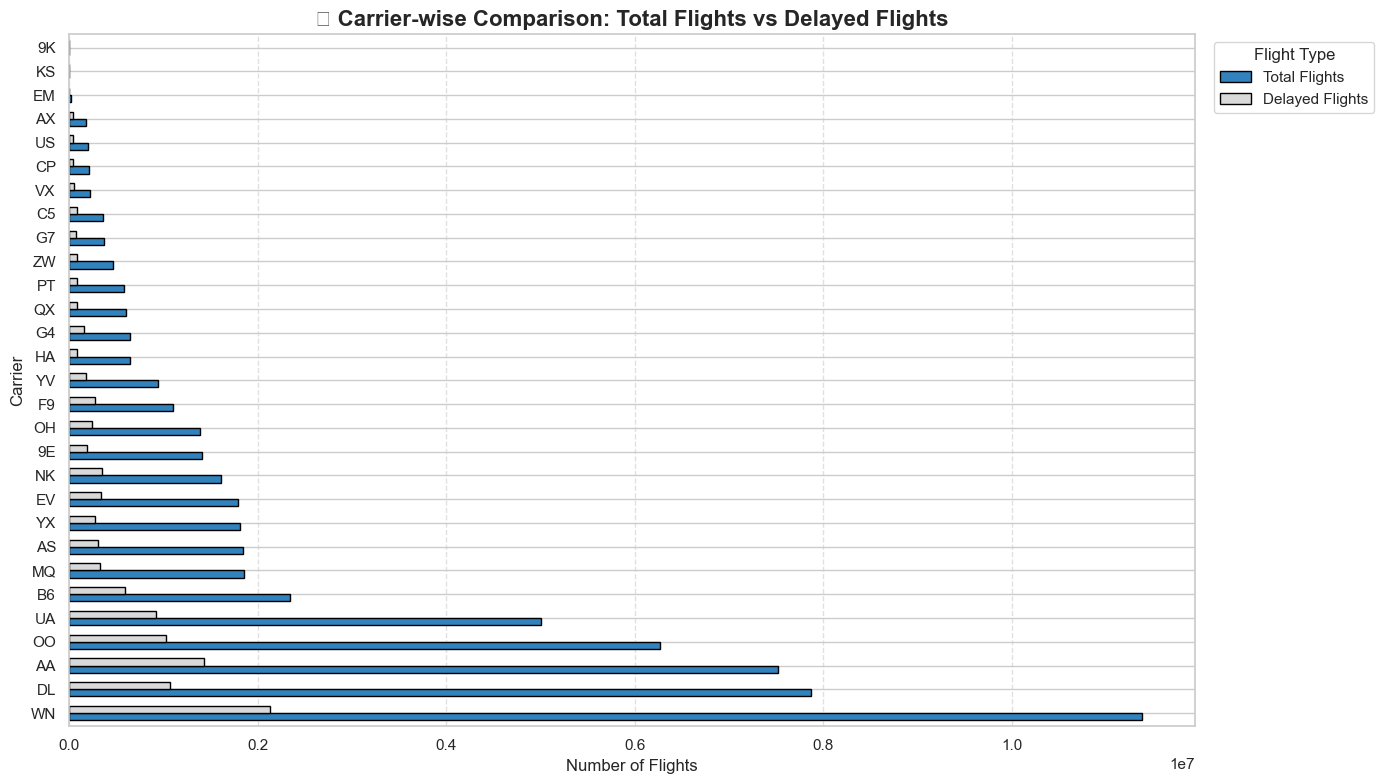

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


carrier_summary_sorted = carrier_summary.sort_values(by='arr_flights', ascending=False)


carrier_plot_df = carrier_summary_sorted[['carrier', 'arr_flights', 'arr_del15']].set_index('carrier')

carrier_plot_df = carrier_plot_df.rename(columns={
    'arr_flights': 'Total Flights',
    'arr_del15': 'Delayed Flights'
})

plt.figure(figsize=(14, 8))
carrier_plot_df.plot(kind='barh', figsize=(14, 8), width=0.6, colormap='tab20c', edgecolor='black')

plt.title('🛫 Carrier-wise Comparison: Total Flights vs Delayed Flights', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Carrier')
plt.legend(title='Flight Type', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\1333100906.py:37: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


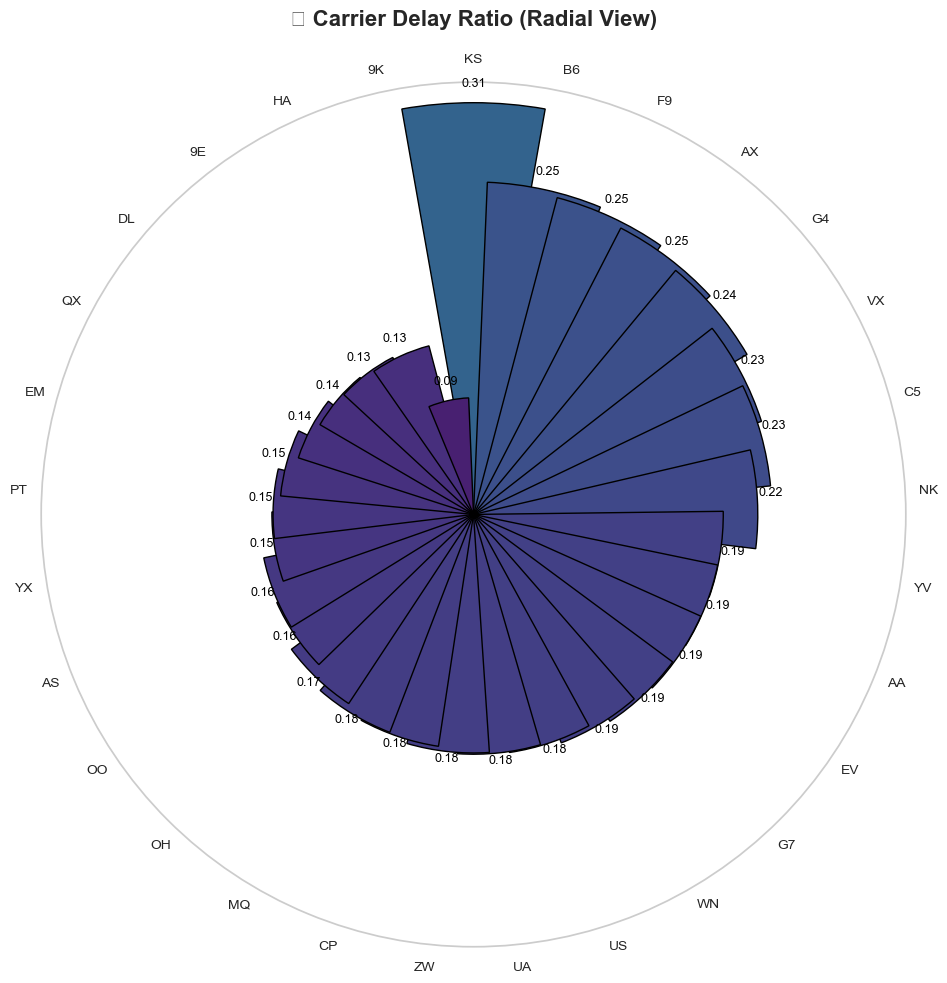

In [72]:
import matplotlib.pyplot as plt
import numpy as np

carrier_delay_sorted = carrier_summary.sort_values(by='delay_ratio', ascending=False)

carriers = carrier_delay_sorted['carrier'].tolist()
ratios = carrier_delay_sorted['delay_ratio'].tolist()
N = len(carriers)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()


ratios += ratios[:1]
angles += angles[:1]
carriers += carriers[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
bars = ax.bar(angles[:-1], ratios[:-1], width=0.35, color=plt.cm.viridis(ratios[:-1]), edgecolor='black')


ax.set_xticks(angles[:-1])
ax.set_xticklabels(carriers[:-1], fontsize=10)


ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_title('🌀 Carrier Delay Ratio (Radial View)', fontsize=16, fontweight='bold', pad=20)
ax.set_yticklabels([])  # Hide radial ticks
ax.grid(False)


for bar, ratio in zip(bars, ratios[:-1]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{ratio:.2f}', 
            ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\857133285.py:29: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


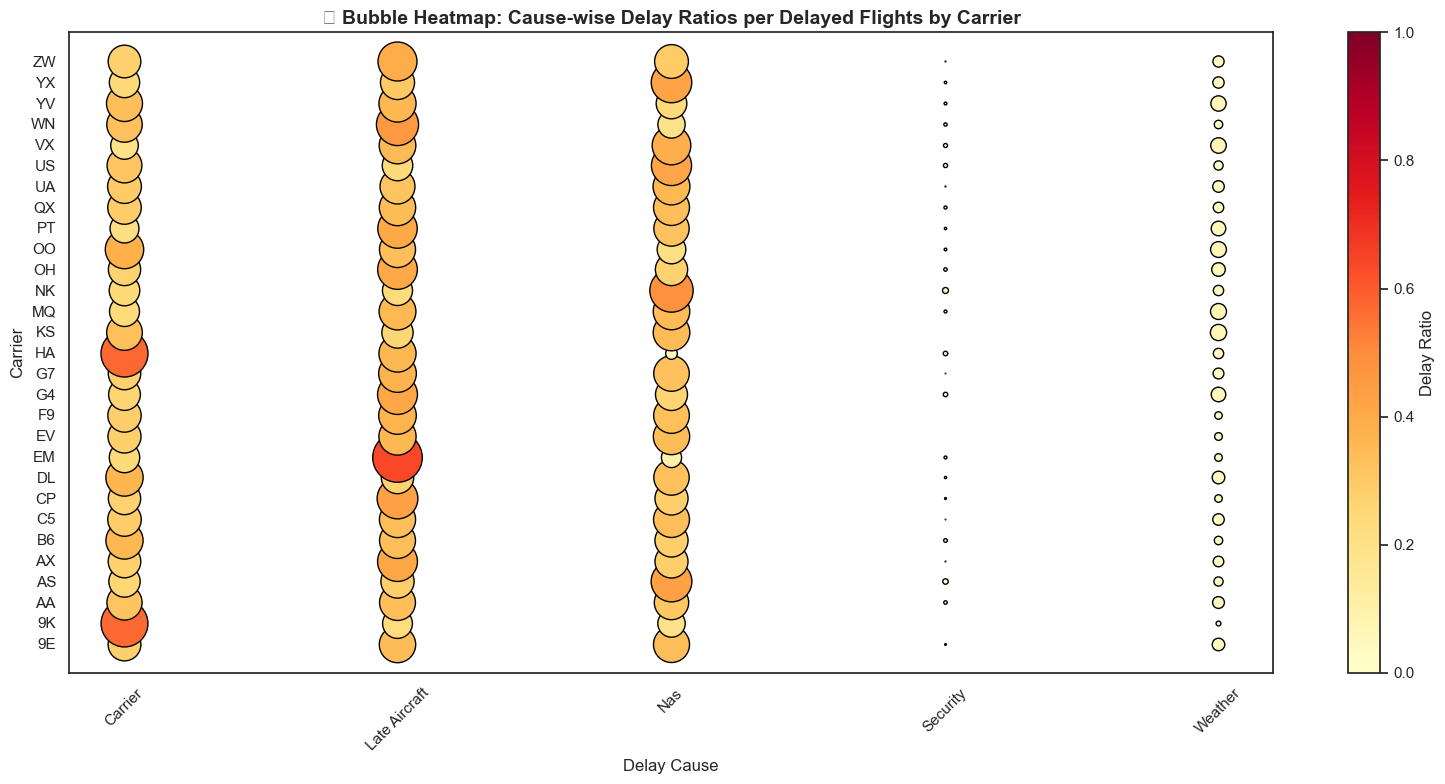

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns


count_ratio_delayed = [f'{c}_ct_ratio' for c in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']]
df_bubble = carrier_summary[['carrier'] + count_ratio_delayed].copy()

df_melted = df_bubble.melt(id_vars='carrier', var_name='Cause', value_name='Ratio')
df_melted['Cause'] = df_melted['Cause'].str.replace('_ct_ratio', '').str.replace('_', ' ').str.title()

pivot = df_melted.pivot(index='carrier', columns='Cause', values='Ratio')

plt.figure(figsize=(16, 8))
sns.set(style="white")

for i, carrier in enumerate(pivot.index):
    for j, cause in enumerate(pivot.columns):
        ratio = pivot.loc[carrier, cause]
        plt.scatter(j, i, s=ratio * 2000, c=ratio, cmap='YlOrRd', edgecolors='black', vmin=0, vmax=1)


plt.xticks(ticks=range(len(pivot.columns)), labels=pivot.columns, rotation=45)
plt.yticks(ticks=range(len(pivot.index)), labels=pivot.index)
plt.title('🔵 Bubble Heatmap: Cause-wise Delay Ratios per Delayed Flights by Carrier', fontsize=14, fontweight='bold')
plt.xlabel('Delay Cause')
plt.ylabel('Carrier')
plt.grid(False)
plt.colorbar(label='Delay Ratio')
plt.tight_layout()
plt.show()


In [74]:
max_delay_ratio = carrier_summary.loc[carrier_summary['delay_ratio'].idxmax()]
min_delay_ratio = carrier_summary.loc[carrier_summary['delay_ratio'].idxmin()]


In [75]:
max_delay_ratio = carrier_summary.loc[carrier_summary['delay_ratio'].idxmax()]
min_delay_ratio = carrier_summary.loc[carrier_summary['delay_ratio'].idxmin()]


In [76]:
max_flights = carrier_summary.loc[carrier_summary['arr_flights'].idxmax()]
min_flights = carrier_summary.loc[carrier_summary['arr_flights'].idxmin()]


In [77]:
for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    max_ratio = carrier_summary.loc[carrier_summary[f'{cause}_ct_ratio'].idxmax()]
    min_ratio = carrier_summary.loc[carrier_summary[f'{cause}_ct_ratio'].idxmin()]
    print(f"{cause.upper()} Delay Ratio - Max: {max_ratio['carrier']}, Min: {min_ratio['carrier']}")


CARRIER Delay Ratio - Max: HA, Min: VX
WEATHER Delay Ratio - Max: KS, Min: 9K
NAS Delay Ratio - Max: NK, Min: HA
SECURITY Delay Ratio - Max: NK, Min: 9K
LATE_AIRCRAFT Delay Ratio - Max: EM, Min: 9K


In [78]:

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    max_min = carrier_summary.loc[carrier_summary[f'{cause}_min_ratio'].idxmax()]
    min_min = carrier_summary.loc[carrier_summary[f'{cause}_min_ratio'].idxmin()]
    print(f"{cause.upper()} Delay Minutes/Delayed Flights - Max: {max_min['carrier']}, Min: {min_min['carrier']}")


CARRIER Delay Minutes/Delayed Flights - Max: OO, Min: VX
WEATHER Delay Minutes/Delayed Flights - Max: OO, Min: 9K
NAS Delay Minutes/Delayed Flights - Max: NK, Min: HA
SECURITY Delay Minutes/Delayed Flights - Max: NK, Min: 9K
LATE_AIRCRAFT Delay Minutes/Delayed Flights - Max: AX, Min: US


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\1723633335.py:15: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


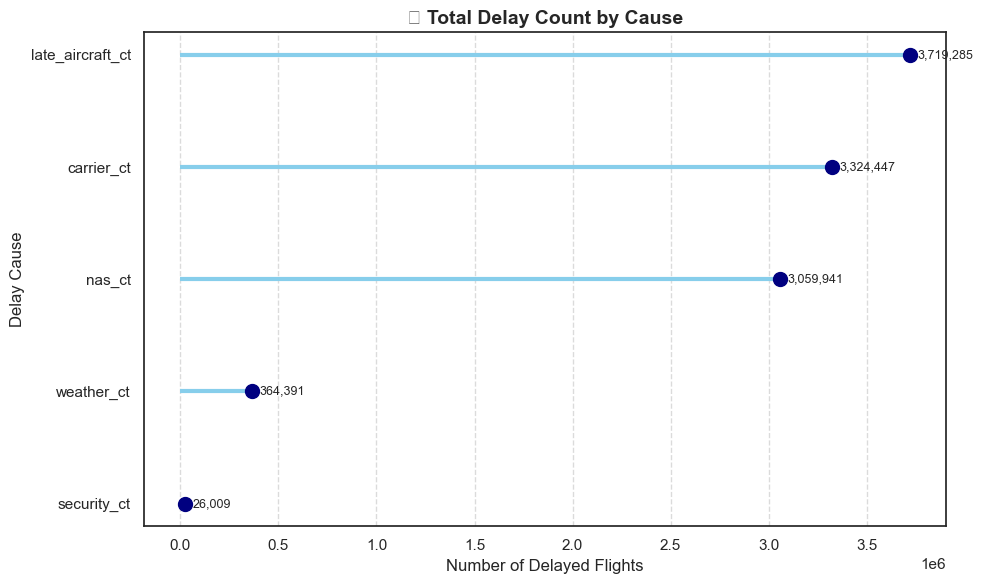

In [79]:

total_delay_counts = data[count_col].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.hlines(y=total_delay_counts.index, xmin=0, xmax=total_delay_counts.values, color='skyblue', linewidth=3)
plt.plot(total_delay_counts.values, total_delay_counts.index, "o", markersize=10, color='navy')

for i, (val, label) in enumerate(zip(total_delay_counts.values, total_delay_counts.index)):
    plt.text(val + max(total_delay_counts.values) * 0.01, i, f'{int(val):,}', va='center', fontsize=9)


plt.title('🎯 Total Delay Count by Cause', fontsize=14, fontweight='bold')
plt.xlabel('Number of Delayed Flights')
plt.ylabel('Delay Cause')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Modelling**

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,mean_absolute_error, mean_squared_error
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [81]:
data['delay_ratio'] = data['arr_del15']/data['arr_flights']

In [82]:
class_df = data[['airport','carrier','month']]


In [83]:
threshold = 0.5
class_df['is_delayed'] = (data['delay_ratio'] >= threshold).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\264035512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['is_delayed'] = (data['delay_ratio'] >= threshold).astype(int)


In [84]:
X = class_df[['airport', 'carrier', 'month']]
y = class_df['is_delayed']

In [85]:

X_encoded = X.copy()
cat_cols = ['airport', 'carrier']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)


In [89]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

🔍 Classification Report:



,precision,recall,f1-score,support
0,0.985,0.997,0.991,35264.000
1,0.091,0.022,0.036,536.000
accuracy,0.982,0.982,0.982,0.982
macro avg,0.538,0.509,0.513,35800.000
weighted avg,0.972,0.982,0.977,35800.000



📌 Additional Evaluation Metrics:
✔️ Accuracy       : 0.982
✔️ Precision      : 0.091
✔️ Recall         : 0.022
✔️ F1 Score       : 0.036
💡 ROC AUC Score : 0.632


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\1395968232.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


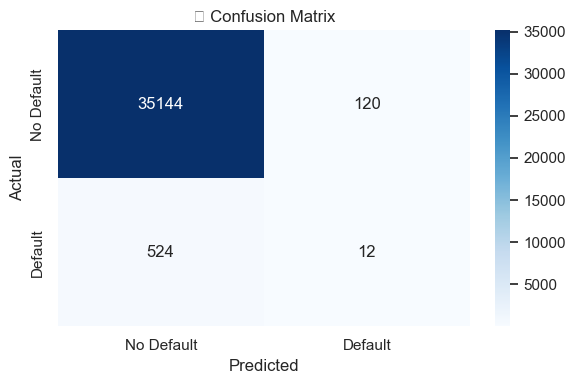

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\1395968232.py:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


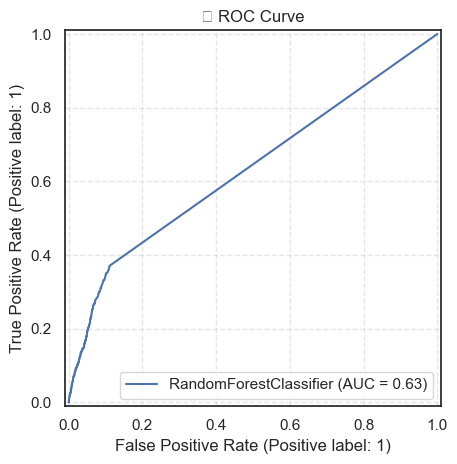

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # For ROC AUC

# 📊 Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("🔍 Classification Report:\n")
display(report_df.round(3))


print("\n📌 Additional Evaluation Metrics:")
print(f"✔️ Accuracy       : {accuracy_score(y_test, y_pred):.3f}")
print(f"✔️ Precision      : {precision_score(y_test, y_pred):.3f}")
print(f"✔️ Recall         : {recall_score(y_test, y_pred):.3f}")
print(f"✔️ F1 Score       : {f1_score(y_test, y_pred):.3f}")
print(f"💡 ROC AUC Score : {roc_auc_score(y_test, y_prob):.3f}")

# 🔷 Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 🔺 ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("📈 ROC Curve")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [91]:
y.value_counts()


is_delayed
0    176317
1      2680
Name: count, dtype: int64

In [92]:
smote = SMOTE(random_state = 42)
x_resampled , y_resampled = smote.fit_resample(X_train,y_train)

In [93]:
clf.fit(x_resampled,y_resampled)


RandomForestClassifier(random_state=42)

📋 Classification Report:

              precision    recall  f1-score   support

           0      0.988     0.879     0.931     35264
           1      0.039     0.325     0.070       536

    accuracy                          0.871     35800
   macro avg      0.514     0.602     0.500     35800
weighted avg      0.974     0.871     0.918     35800

📊 Confusion Matrix:
 [[30996  4268]
 [  362   174]]


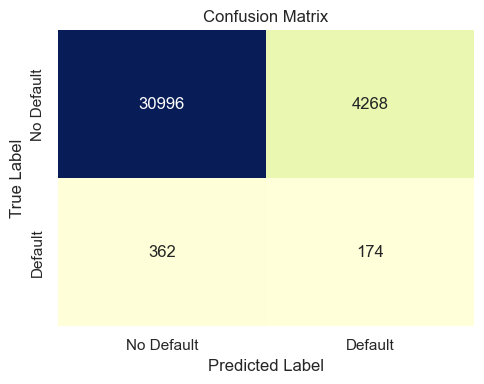

📈 ROC AUC Score: 0.680


In [94]:

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))


cm = confusion_matrix(y_test, y_pred)

print("📊 Confusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

auc = roc_auc_score(y_test, y_prob)
print(f"📈 ROC AUC Score: {auc:.3f}")


In [95]:
X_test.shape

(35800, 3)

In [96]:
data['OAI'] = 2 * (data['carrier_delay'] + data['late_aircraft_delay']) + \
            1 * (data['weather_delay'] + data['nas_delay'] + data['security_delay'])

In [97]:
features = ['airport', 'carrier', 'month', 'delay_ratio']
X = data[features]
y = data['OAI']

In [98]:
encoder = OrdinalEncoder()
X_encoded = X.copy()
X_encoded[['airport', 'carrier']] = encoder.fit_transform(X_encoded[['airport', 'carrier']])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [100]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

📌 Mean Absolute Error (MAE): 2208.866
📌 Root Mean Squared Error (RMSE): 6804.753
📌 R² Score: 0.881


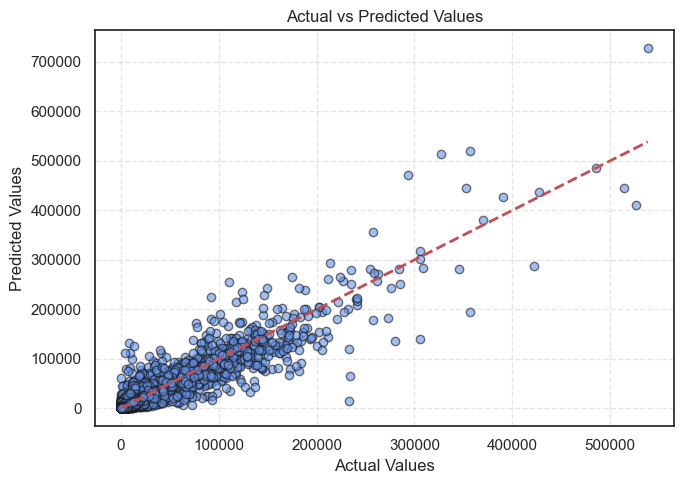

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Absolute Error (MAE): {mae:.3f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"📌 R² Score: {r2:.3f}")

# 📊 Visualization (Actual vs Predicted)
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='cornflowerblue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1528\683137883.py:17: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


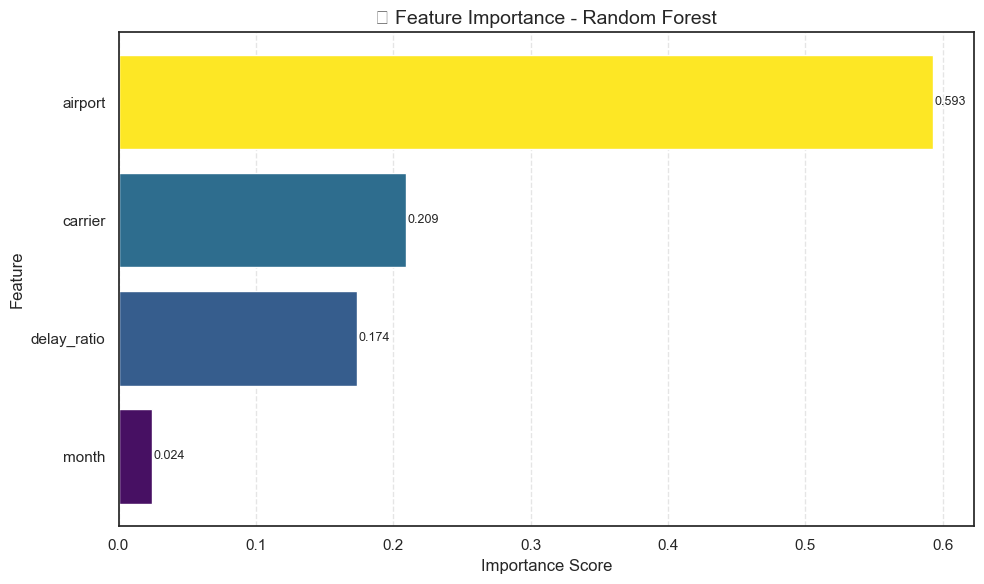

In [102]:

importances = regressor.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=plt.cm.viridis(importance_df['Importance'] / max(importance_df['Importance'])))

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}', va='center', fontsize=9)

plt.title("🎯 Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [103]:
top_delays = data.groupby(['carrier', 'month'])['OAI'].mean().sort_values(ascending=False).head(10)
top_delays

carrier  month
WN       7        29658.616210
         6        27794.750594
AA       7        24064.701313
WN       8        23923.069048
AA       6        22845.025756
WN       12       22312.570922
AA       8        20876.776824
WN       5        19837.163290
         4        18725.761677
         3        18204.416366
Name: OAI, dtype: float64

In [104]:
class_df['delay_ratio'] =data['delay_ratio']

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\3720395710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['delay_ratio'] =data['delay_ratio']


In [105]:
class_df.drop(['is_delayed'], axis = 1 , inplace = True )

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\3767218070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df.drop(['is_delayed'], axis = 1 , inplace = True )


In [106]:
class_df['avg_delay']= data['arr_delay']/data['arr_del15']

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\21078095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df['avg_delay']= data['arr_delay']/data['arr_del15']


In [107]:
class_df.shape

(178997, 5)

In [108]:
class_df.isnull().sum()

airport           0
carrier           0
month             0
delay_ratio       0
avg_delay      8623
dtype: int64

In [109]:
class_df.dropna(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1528\135733839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_df.dropna(inplace=True)


In [110]:
class_df.shape

(170374, 5)

In [111]:
X = class_df[['airport', 'carrier', 'month']]
y = class_df['avg_delay']

In [112]:
X_encoded = X.copy()
cat_cols = ['airport', 'carrier']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

In [113]:
X_encoded['delay_ratio'] = class_df['delay_ratio']

In [114]:
X_encoded

,airport,carrier,month,delay_ratio
0,0,0,12,0.069444
1,11,0,12,0.112903
2,12,0,12,0.105263
3,14,0,12,0.086957
4,23,0,12,0.121270
...,...,...,...,...
179333,267,25,1,0.206278
179334,269,25,1,0.298013
179335,277,25,1,0.270916
179336,278,25,1,0.218159


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [116]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
y_pred = regressor.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 21.10845155858473
RMSE: 38.534521071385505
